In [13]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [36]:
file_path1 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testx.csv"
file_path2 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testz.csv"
file_path3 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testalpha.csv"
file_path4 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testflow.csv"
file_path5 = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/bumblebee.csv"

In [37]:
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)
data3 = pd.read_csv(file_path3)
data4 = pd.read_csv(file_path4)
data5 = pd.read_csv(file_path5)

In [38]:
# times,frequency,temperature,mass_flow,volume_flow,mouth_pressure,offset,theta,radius,alpha,
# z,x,alpha_ref,z_ref,x_ref,flow_ref,offset_ref,theta_ref,radius_ref
def transform_dataframe(df):
    # Crear un nuevo DataFrame con las columnas "times", "value" y "signal"
    new_df = pd.DataFrame(columns=['times', 'value', 'signal'])
    
    # Crear una lista de DataFrames, uno para cada columna excepto "times"
    dfs = [pd.DataFrame({'times': df['times'], 'value': df[col], 'signal': col}) for col in df.columns.difference(['times'])]
    
    # Concatenar los DataFrames en la lista en uno solo
    new_df = pd.concat(dfs, ignore_index=True)
    
    return new_df



In [159]:
data3

Unnamed: 0       times  frequency  temperature  mass_flow  volume_flow  \
0              0    0.000000     2100.0    27.387501   0.726562     1.117188   
1              1    0.067347     2100.0    27.387501   0.726562     1.117188   
2              2    0.129418     2100.0    27.387501   0.726562     1.117188   
3              3    0.191992     2100.0    27.387501   0.726562     1.117188   
4              4    0.254137     2100.0    27.387501   0.726562     1.117188   
...          ...         ...        ...          ...        ...          ...   
3276        3276  205.030636     2100.0    27.431250   0.726562     1.117188   
3277        3277  205.094394     2100.0    27.431250   0.726562     1.117188   
3278        3278  205.157587     2100.0    27.431250   0.726562     1.117188   
3279        3279  205.220932     2100.0    27.431250   0.726562     1.117188   
3280        3280  205.282057     2100.0    27.431250   0.726562     1.117188   

      mouth_pressure  offset  theta  radius  ...  z_ref  x_ref  flow_ref  \
0          -6.713725   76.30  45.00  115.98  ...    0.0    0.0       0.0   
1          -6.640749   76.30  45.00  115.98  ...    0.0    0.0       0.0   
2          -6.750212   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3          -6.859675   76.30  45.00  115.98  ...    0.0    0.0       0.0   
4          -6.750212   76.52  44.91  116.04  ...    0.0    0.0       0.0   
...              ...     ...    ...     ...  ...    ...    ...       ...   
3276       -6.373173   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3277       -6.385336   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3278       -6.263710   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3279       -6.397499   76.30  45.00  115.98  ...    0.0    0.0       0.0   
3280       -6.421824   76.30  45.00  115.98  ...    0.0    0.0       0.0   

      offset_ref  theta_ref  radius_ref  shifted_alpha  shifted_alpha_ref  \
0          76.30      45.00      115.98          10.00              10.00   
1          76.52      44.91      116.04          10.00               9.91   
2          76.75      44.82      116.09          10.00               9.82   
3          76.97      44.73      116.15          10.00               9.73   
4          77.42      44.55      116.27           9.91               9.55   
...          ...        ...         ...            ...                ...   
3276       76.30      45.00      115.98          10.00              10.00   
3277       76.30      45.00      115.98          10.00              10.00   
3278       76.30      45.00      115.98          10.00              10.00   
3279       76.30      45.00      115.98          10.00              10.00   
3280       76.30      45.00      115.98          10.00              10.00   

      Alpha  Alpha ref  
0     10.00      10.00  
1     10.00       9.91  
2     10.00       9.82  
3     10.00       9.73  
4      9.91       9.55  
...     ...        ...  
3276  10.00      10.00  
3277  10.00      10.00  
3278  10.00      10.00  
3279  10.00      10.00  
3280  10.00      10.00  

[3281 rows x 24 columns]

In [225]:
data1['X'] = data1['x'] - 20 
data1['X ref'] = data1['x_ref'] - 20 

data2['Z'] = data2['z'] - 20 
data2['Z ref'] = data2['z_ref'] - 20 

data3['Alpha'] = data3['alpha'] + 15
data3['Alpha ref'] = data3['alpha_ref'] + 15

data4['Flow'] = data4['mass_flow']
data4['Flow ref'] = data4['flow_ref']


In [226]:
new_data1 = transform_dataframe(data1)
new_data2 = transform_dataframe(data2)
new_data3 = transform_dataframe(data3)
new_data4 = transform_dataframe(data4)
new_data5 = transform_dataframe(data5)

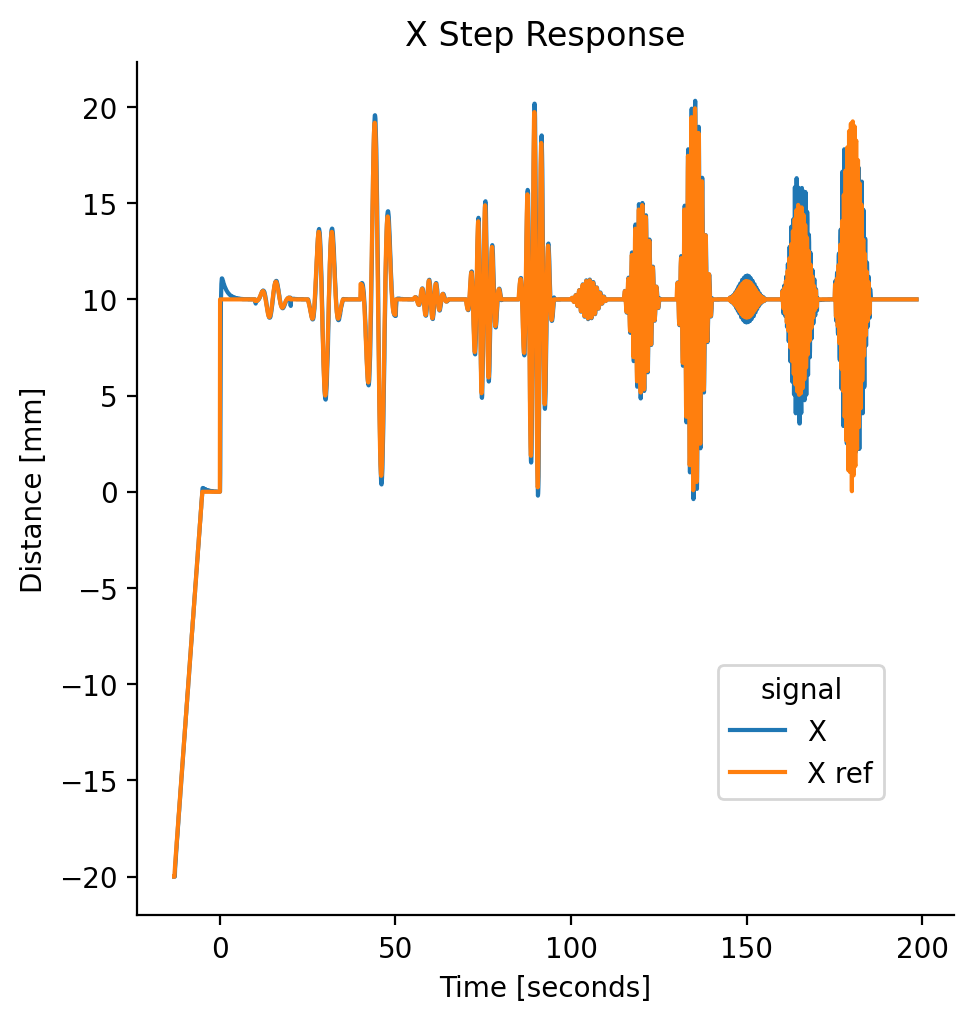

In [148]:
new_data1['Time'] = new_data1['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data1.loc[(new_data1['signal'] == 'X') | (new_data1['signal'] == 'X ref')], kind="line", x='Time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('X Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.show()

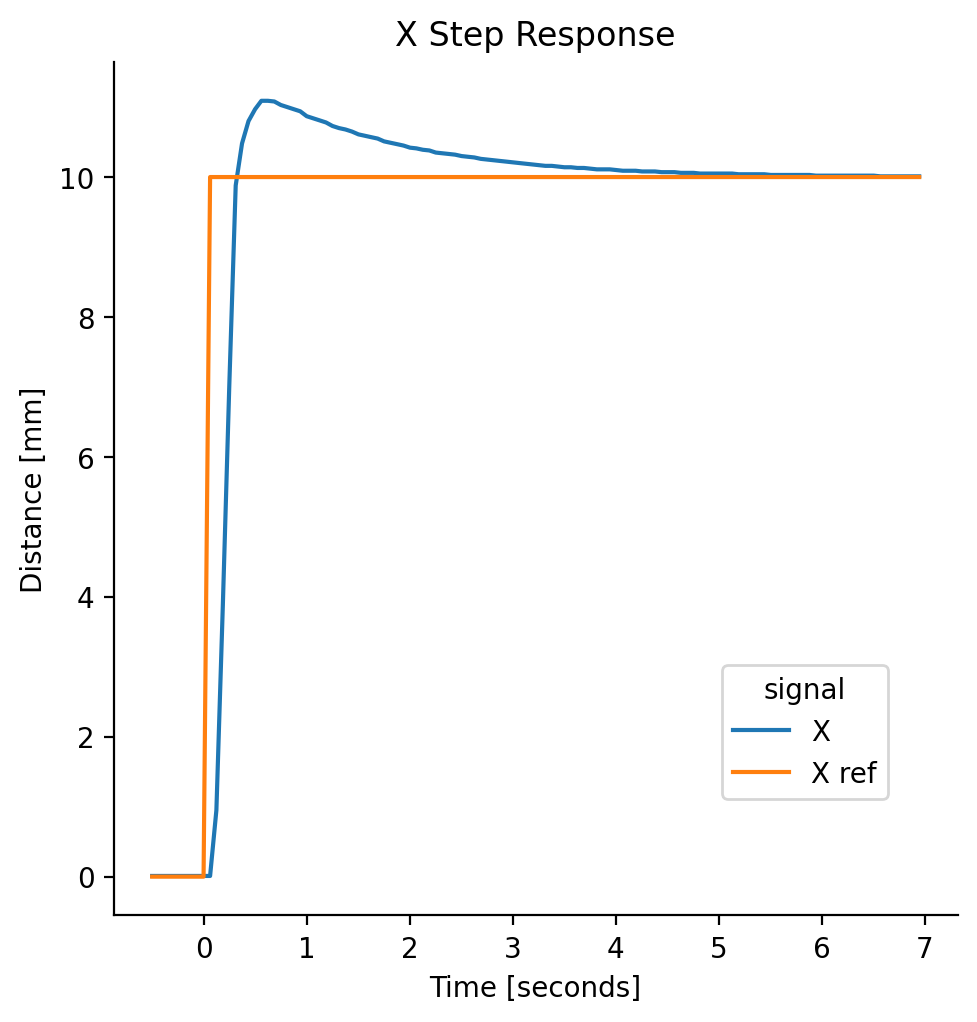

In [149]:
new_data1['step_shifted_time'] = new_data1['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
d = new_data1.loc[((new_data1['signal'] == 'X') | (new_data1['signal'] == 'X ref')) & (new_data1['times'] > 12.5) & (new_data1['times'] < 20)]
p = sns.relplot(data=d, kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('X Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.savefig('x_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

In [254]:
df = data4.loc[(data4['times'] > 12.5) & (data4['times'] < 20)]
df['time'] = df['times']-13
cv = 'Flow'

# assuming your dataframe is called `df` and the response column is 'response'
steady_state = df[cv].iloc[-10:].mean()

# calculate rise time
rise_time = df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time'].iloc[-1] - df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time'].iloc[0]

# calculate overshoot
peak = df[cv].max()
overshoot = (peak - steady_state)/steady_state * 100

# # calculate settling time
settling_percentage = 0.02
settling_criteria = steady_state * (1 - settling_percentage)
settling_time = df.loc[df[cv] < settling_criteria, 'time'].iloc[-1]

# # calculate ringing
t = df['time'].to_numpy()
y = df[cv].to_numpy()
f = np.fft.fft(y)
N = len(f)
dt = t[1]-t[0]
freq = np.fft.fftfreq(N, dt)
max_index = np.argmax(np.abs(f[1:N//2]))+1
ringing_period = 1/freq[max_index]
ringing_amplitude = np.abs(f[max_index])/N*2
num_ringing_cycles = np.sum(np.abs(np.cos(2*np.pi*freq[max_index]*t) - np.cos(2*np.pi*freq[max_index]*t-dt)) > 1e-2)
if num_ringing_cycles == 0:
    ringing_amplitude = 0.0

# # print results
print('Rise time:', rise_time)
print('Overshoot:', overshoot)
print('Settling time:', settling_time)
print('Ringing period:', ringing_period)
print('Ringing amplitude:', ringing_amplitude)
print('Number of ringing cycles:', num_ringing_cycles)

Rise time: 0.12499213218688965
Overshoot: 0.08300375958205165
Settling time: 0.3288459777832031
Ringing period: 7.370796203613281
Ringing amplitude: 3.581571865364866
Number of ringing cycles: 108


C:\Users\ferna\AppData\Local\Temp\ipykernel_460\317045226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['times']-13


In [252]:
df.loc[df[cv] < settling_criteria]

Unnamed: 0      times  frequency  temperature  mass_flow  volume_flow  \
200         200  12.520192     2100.0    27.256250   0.753906     1.160156   
201         201  12.581615     2100.0    27.256250   0.753906     1.160156   
202         202  12.643843     2100.0    27.256250   0.753906     1.160156   
203         203  12.707103     2100.0    27.256250   0.753906     1.160156   
204         204  12.768856     2100.0    27.256250   0.753906     1.160156   
..          ...        ...        ...          ...        ...          ...   
315         315  19.706347     2100.0    26.565626  20.000000    30.449219   
316         316  19.769624     2100.0    26.562500  20.000000    30.449219   
317         317  19.831868     2100.0    26.559376  20.000000    30.451172   
318         318  19.892965     2100.0    26.553125  20.001953    30.451172   
319         319  19.955755     2100.0    26.550001  20.001953    30.451172   

     mouth_pressure  offset  theta  radius  ...  alpha_ref  z_ref  x_ref  \
200       -5.935322    76.3   45.0  115.98  ...        0.0    0.0    0.0   
201       -5.923159    76.3   45.0  115.98  ...        0.0    0.0    0.0   
202       -5.643421    76.3   45.0  115.98  ...        0.0    0.0    0.0   
203       -5.692071    76.3   45.0  115.98  ...        0.0    0.0    0.0   
204       -5.582608    76.3   45.0  115.98  ...        0.0    0.0    0.0   
..              ...     ...    ...     ...  ...        ...    ...    ...   
315      143.749115    76.3   45.0  115.98  ...        0.0    0.0    0.0   
316      144.904556    76.3   45.0  115.98  ...        0.0    0.0    0.0   
317      142.812607    76.3   45.0  115.98  ...        0.0    0.0    0.0   
318      144.661301    76.3   45.0  115.98  ...        0.0    0.0    0.0   
319      144.466705    76.3   45.0  115.98  ...        0.0    0.0    0.0   

     flow_ref  offset_ref  theta_ref  radius_ref       Flow  Flow ref  \
200       0.0        76.3       45.0      115.98   0.753906       0.0   
201       0.0        76.3       45.0      115.98   0.753906       0.0   
202       0.0        76.3       45.0      115.98   0.753906       0.0   
203       0.0        76.3       45.0      115.98   0.753906       0.0   
204       0.0        76.3       45.0      115.98   0.753906       0.0   
..        ...         ...        ...         ...        ...       ...   
315      20.0        76.3       45.0      115.98  20.000000      20.0   
316      20.0        76.3       45.0      115.98  20.000000      20.0   
317      20.0        76.3       45.0      115.98  20.000000      20.0   
318      20.0        76.3       45.0      115.98  20.001953      20.0   
319      20.0        76.3       45.0      115.98  20.001953      20.0   

         time  
200 -0.479808  
201 -0.418385  
202 -0.356157  
203 -0.292897  
204 -0.231144  
..        ...  
315  6.706347  
316  6.769624  
317  6.831868  
318  6.892965  
319  6.955755  

[120 rows x 23 columns]

In [253]:
df.loc[231]
settling_criteria

20.40099609375

In [259]:
data1

Unnamed: 0       times  frequency  temperature  mass_flow  volume_flow  \
0              0    0.000000     2100.0    27.162500   0.736328     1.130859   
1              1    0.077539     2100.0    27.162500   0.736328     1.130859   
2              2    0.195874     2100.0    27.162500   0.736328     1.130859   
3              3    0.258019     2100.0    27.159376   0.736328     1.130859   
4              4    0.320725     2100.0    27.162500   0.736328     1.130859   
...          ...         ...        ...          ...        ...          ...   
3373        3373  211.080861     2100.0    27.187500   0.738281     1.134766   
3374        3374  211.142716     2100.0    27.187500   0.738281     1.134766   
3375        3375  211.205134     2100.0    27.187500   0.738281     1.134766   
3376        3376  211.267348     2100.0    27.187500   0.738281     1.134766   
3377        3377  211.329296     2100.0    27.187500   0.738281     1.134766   

      mouth_pressure  offset  theta  radius  ...  z_ref  x_ref  flow_ref  \
0          -6.166410    76.3   45.0  115.98  ...    0.0   0.00       0.0   
1          -6.421824    76.3   45.0  115.98  ...    0.0   0.00       0.0   
2          -6.482636    76.3   45.0  115.98  ...    0.0   0.46       0.0   
3          -6.786700    76.3   45.0  115.68  ...    0.0   0.61       0.0   
4          -6.567774    76.3   45.0  115.56  ...    0.0   0.77       0.0   
...              ...     ...    ...     ...  ...    ...    ...       ...   
3373       -4.439329    76.3   45.0   95.45  ...    0.0  30.00       0.0   
3374       -4.427166    76.3   45.0   95.45  ...    0.0  30.00       0.0   
3375       -4.269053    76.3   45.0   95.45  ...    0.0  30.00       0.0   
3376       -4.317703    76.3   45.0   95.45  ...    0.0  30.00       0.0   
3377       -4.366354    76.3   45.0   95.45  ...    0.0  30.00       0.0   

      offset_ref  theta_ref  radius_ref  shifted_x  shifted_x_ref      X  \
0           76.3       45.0      115.98     -20.00         -20.00 -20.00   
1           76.3       45.0      115.98     -20.00         -20.00 -20.00   
2           76.3       45.0      115.64     -20.00         -19.54 -20.00   
3           76.3       45.0      115.52     -19.60         -19.39 -19.60   
4           76.3       45.0      115.40     -19.44         -19.23 -19.44   
...          ...        ...         ...        ...            ...    ...   
3373        76.3       45.0       95.45      10.00          10.00  10.00   
3374        76.3       45.0       95.45      10.00          10.00  10.00   
3375        76.3       45.0       95.45      10.00          10.00  10.00   
3376        76.3       45.0       95.45      10.00          10.00  10.00   
3377        76.3       45.0       95.45      10.00          10.00  10.00   

      X ref  
0    -20.00  
1    -20.00  
2    -19.54  
3    -19.39  
4    -19.23  
...     ...  
3373  10.00  
3374  10.00  
3375  10.00  
3376  10.00  
3377  10.00  

[3378 rows x 24 columns]

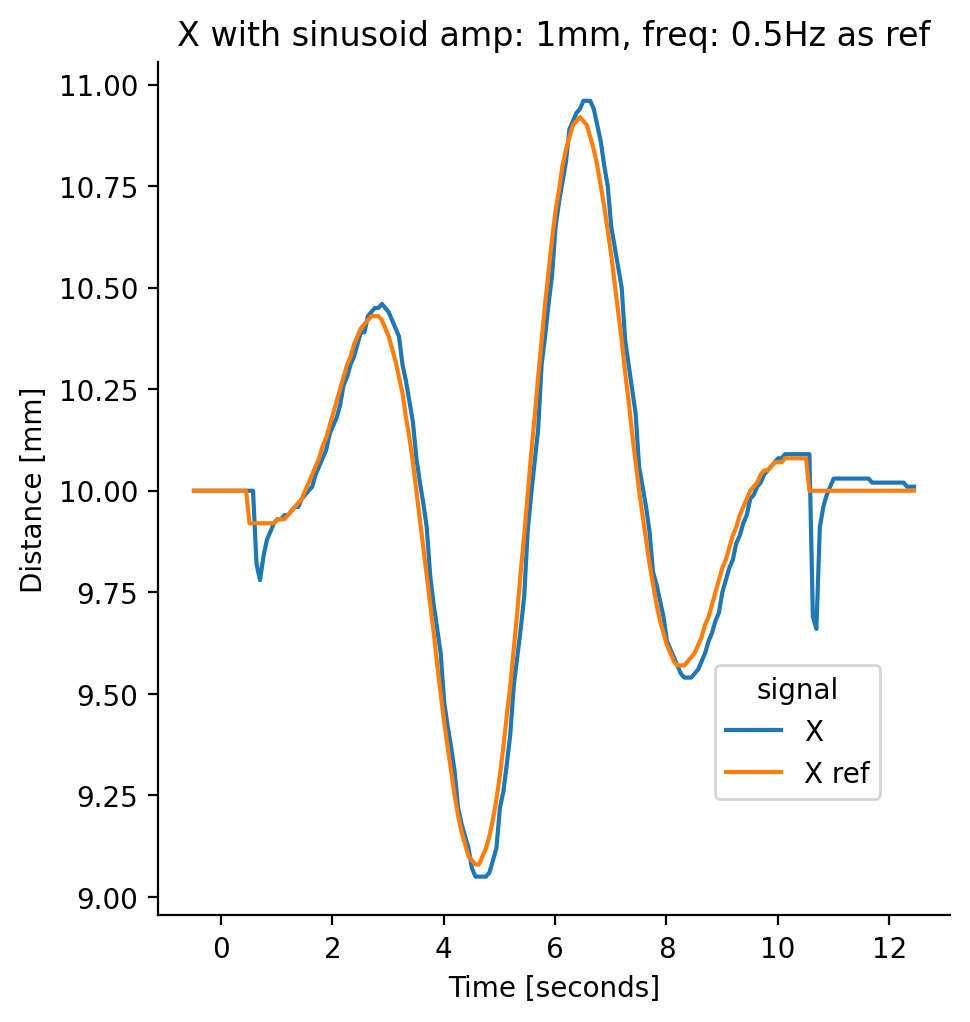

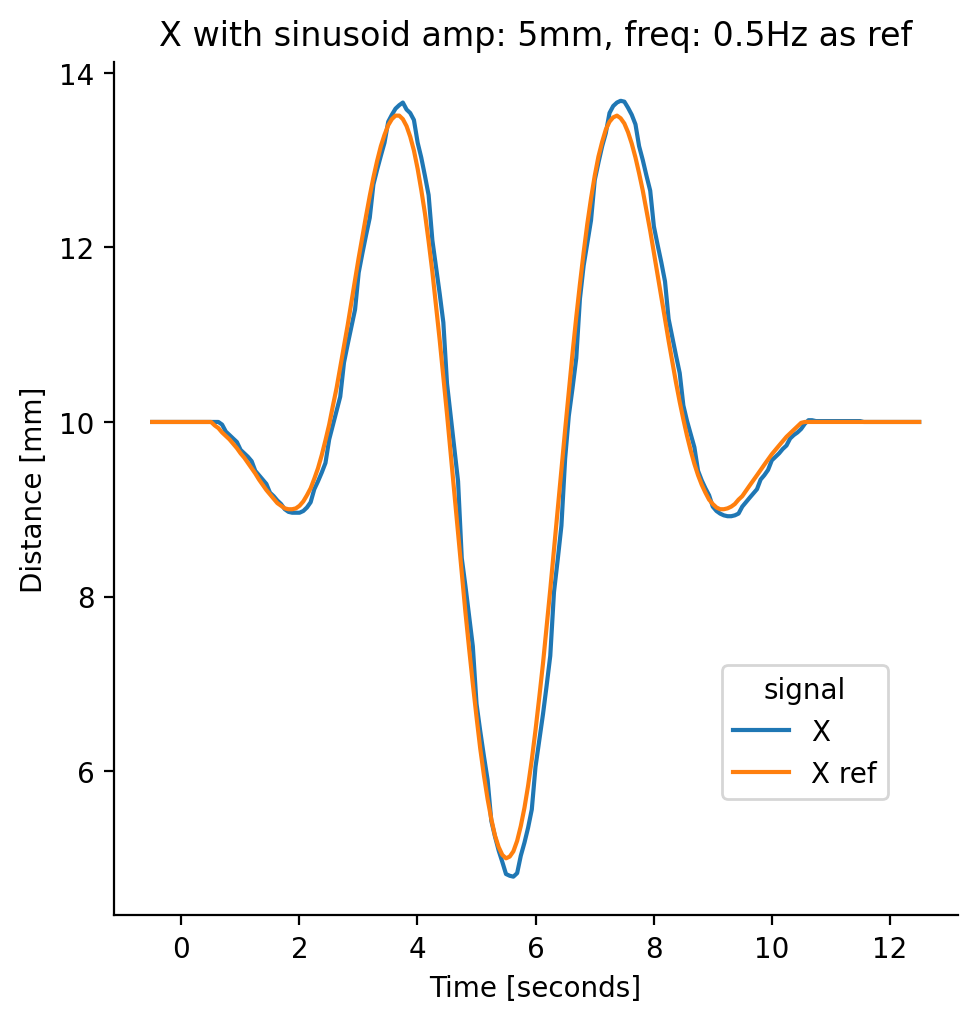

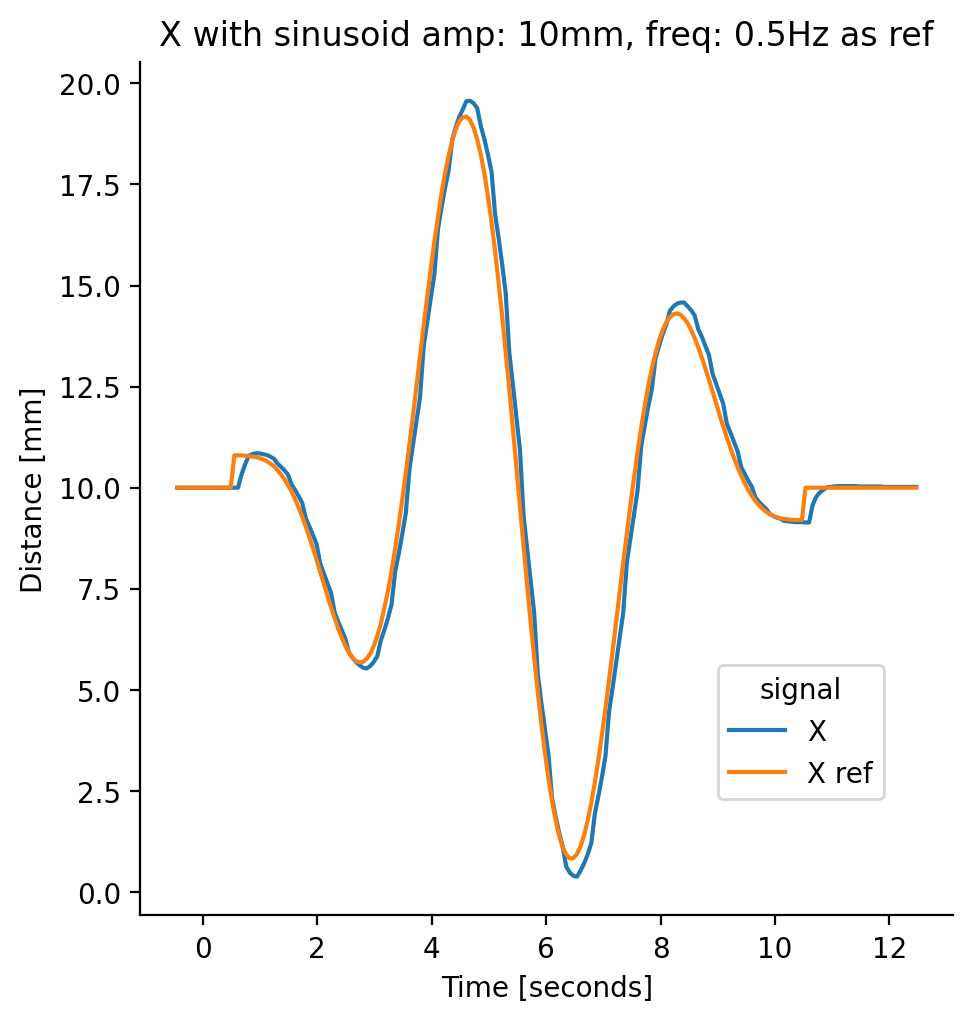

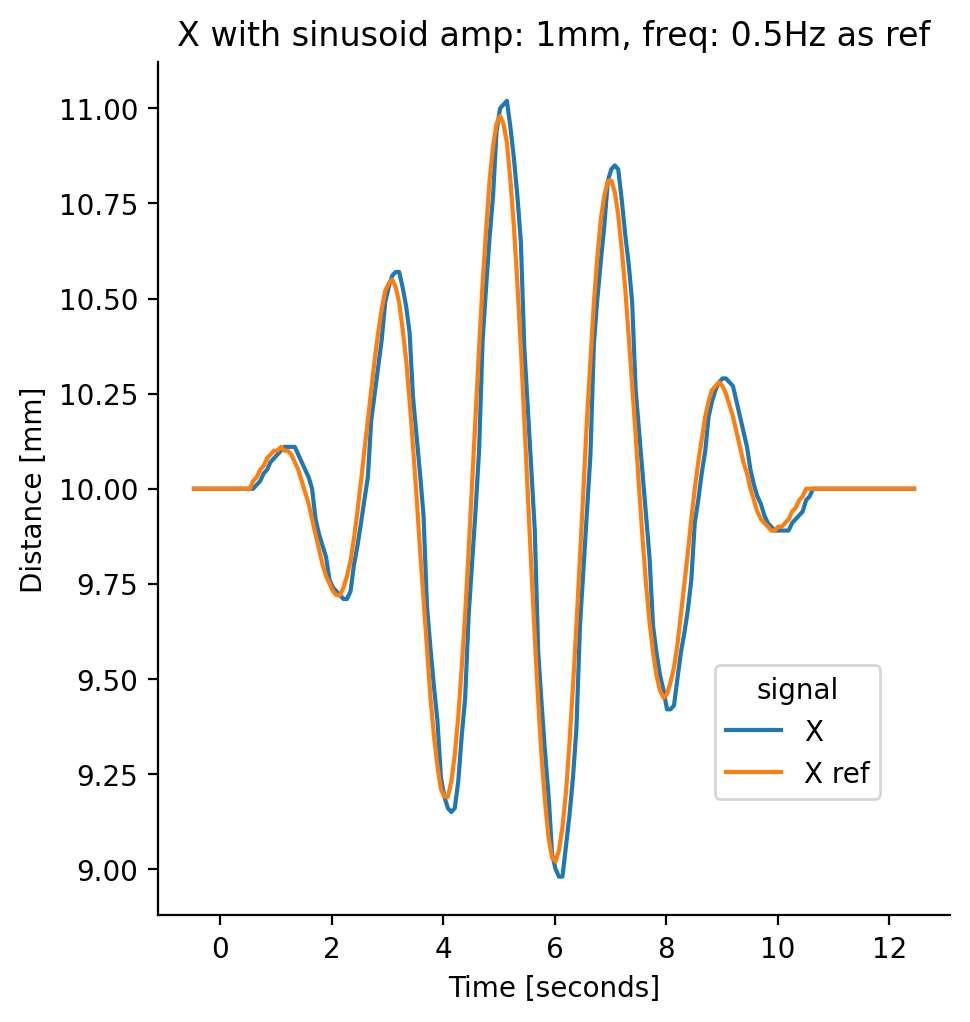

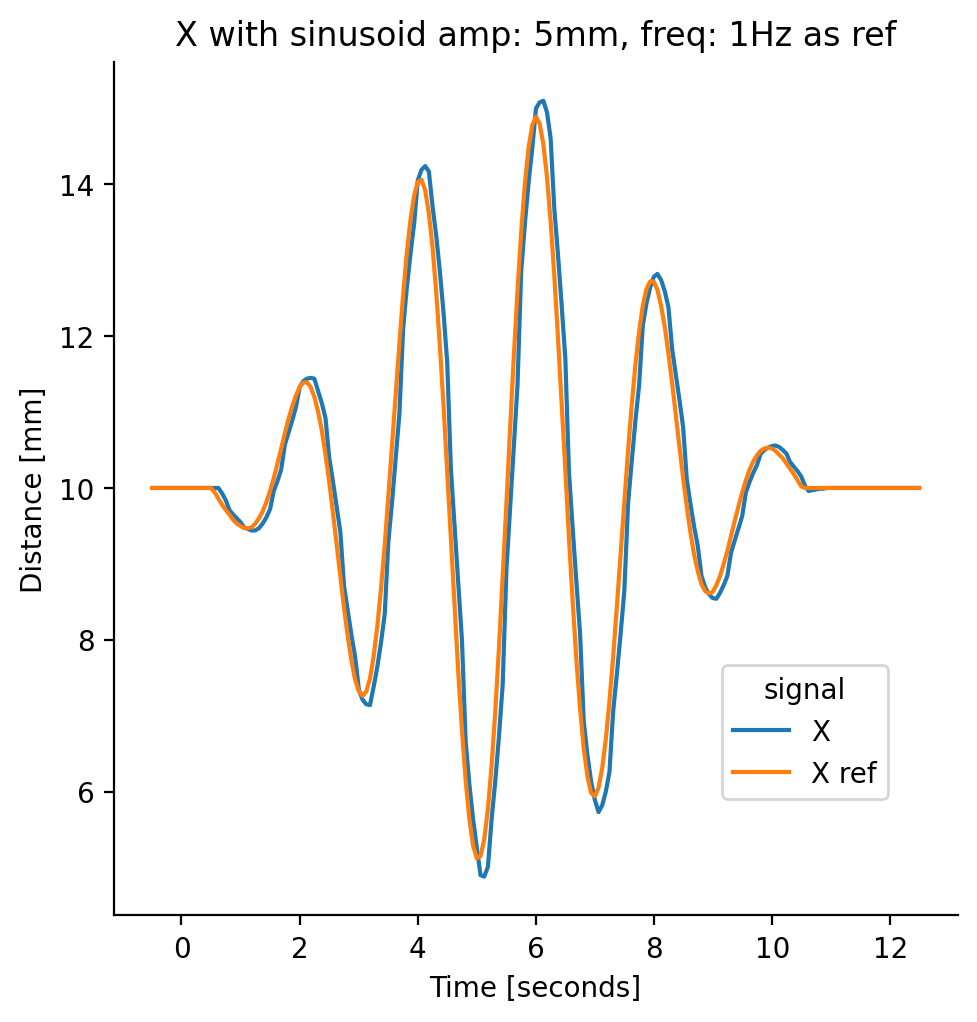

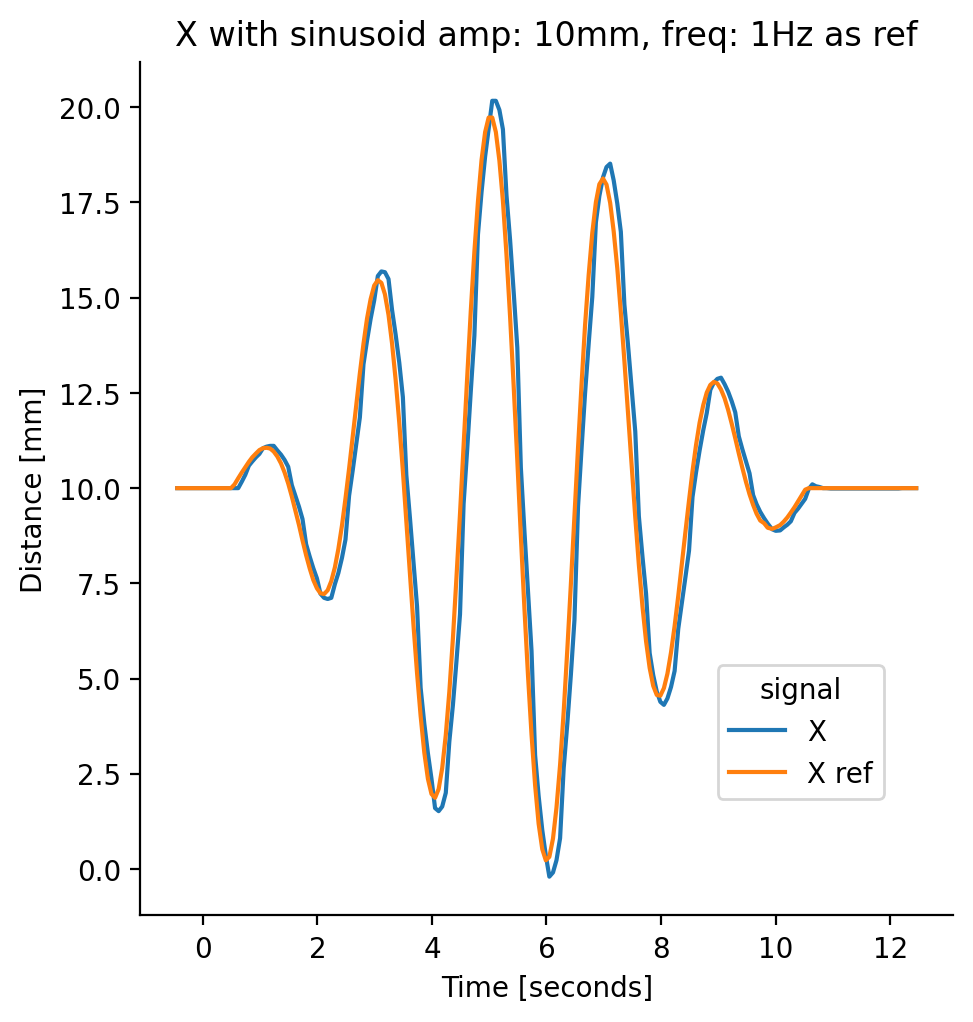

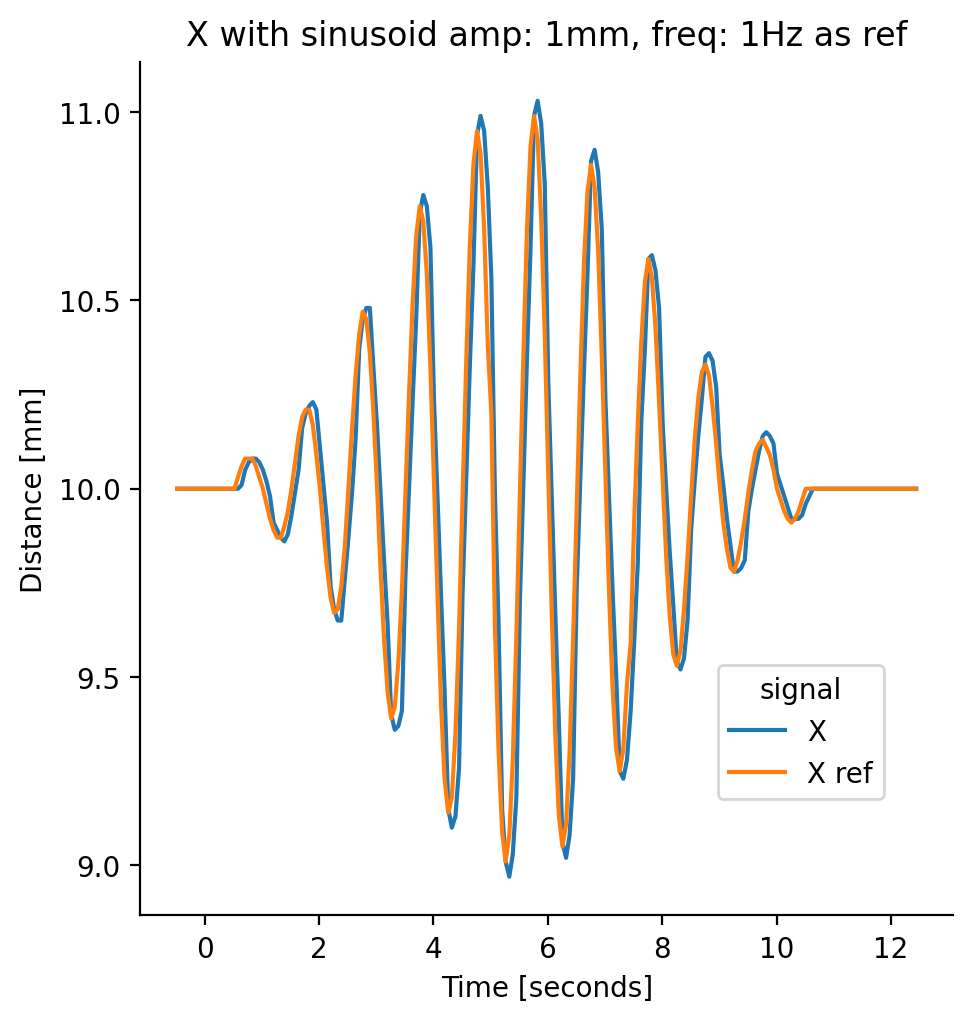

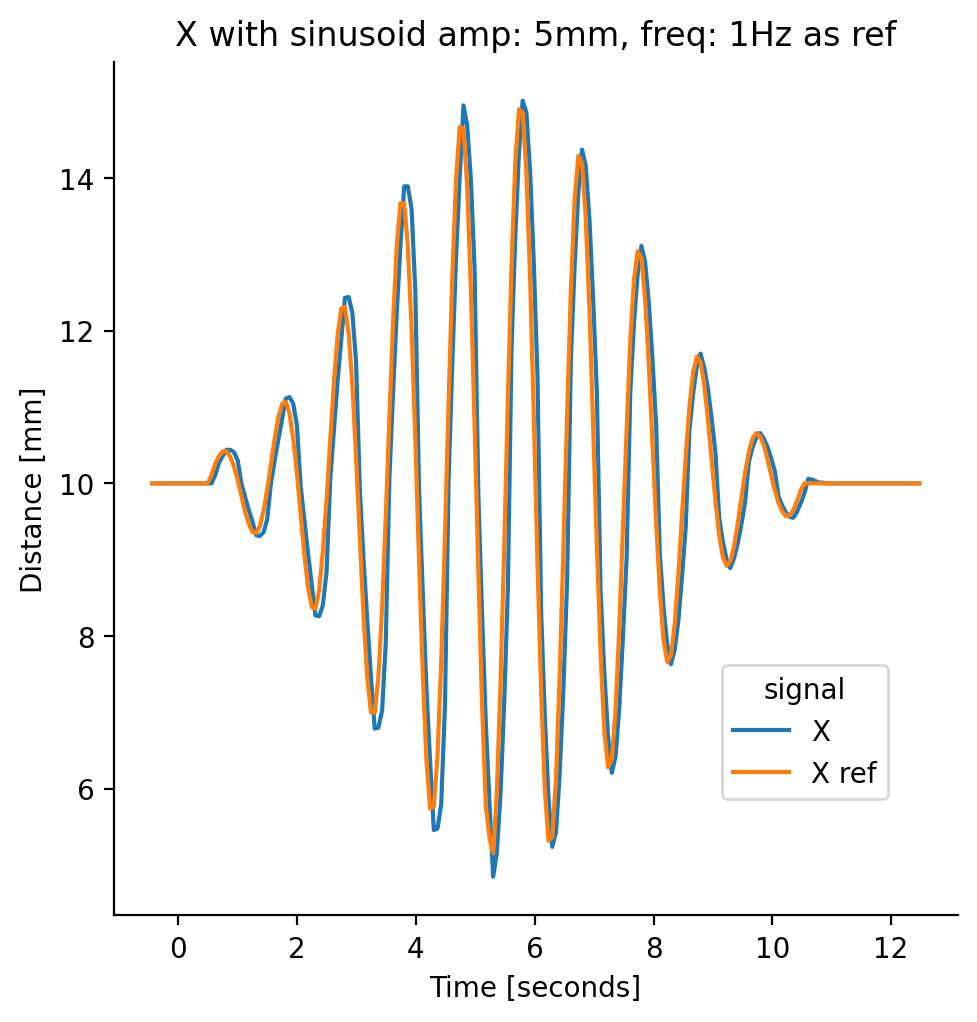

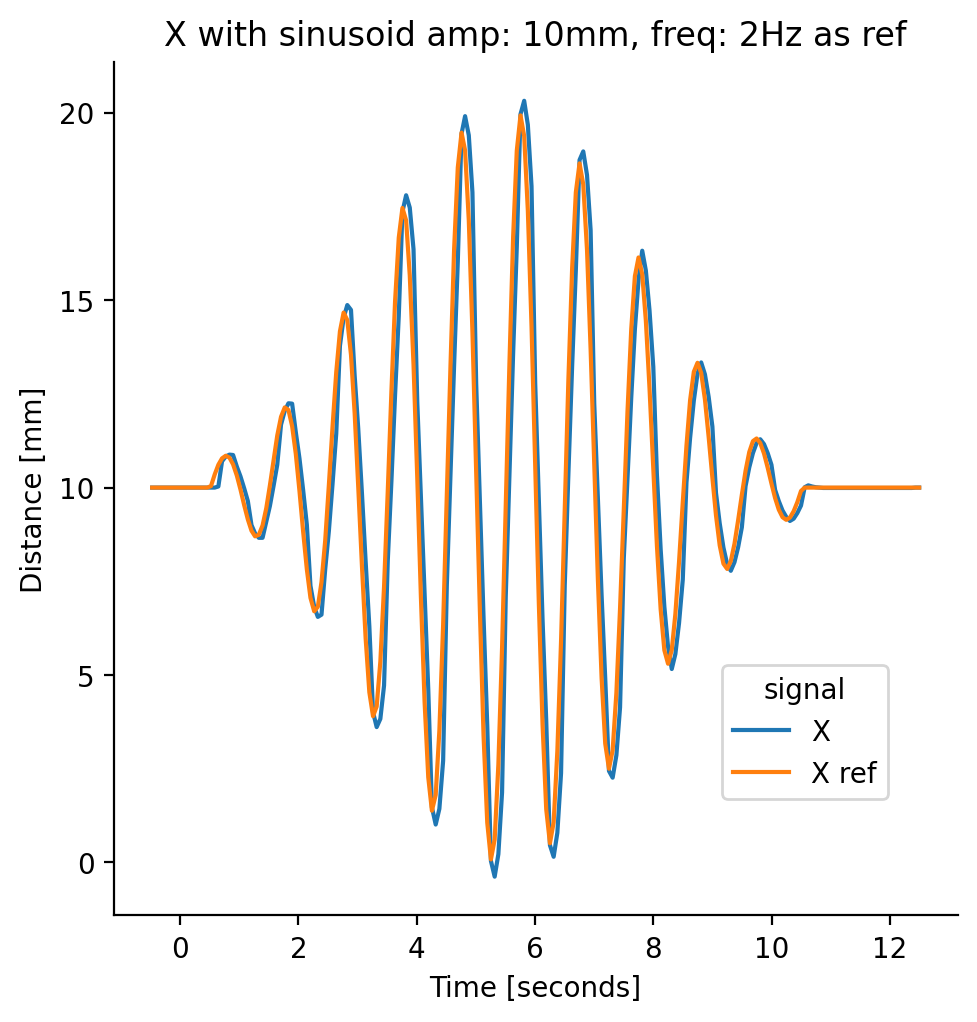

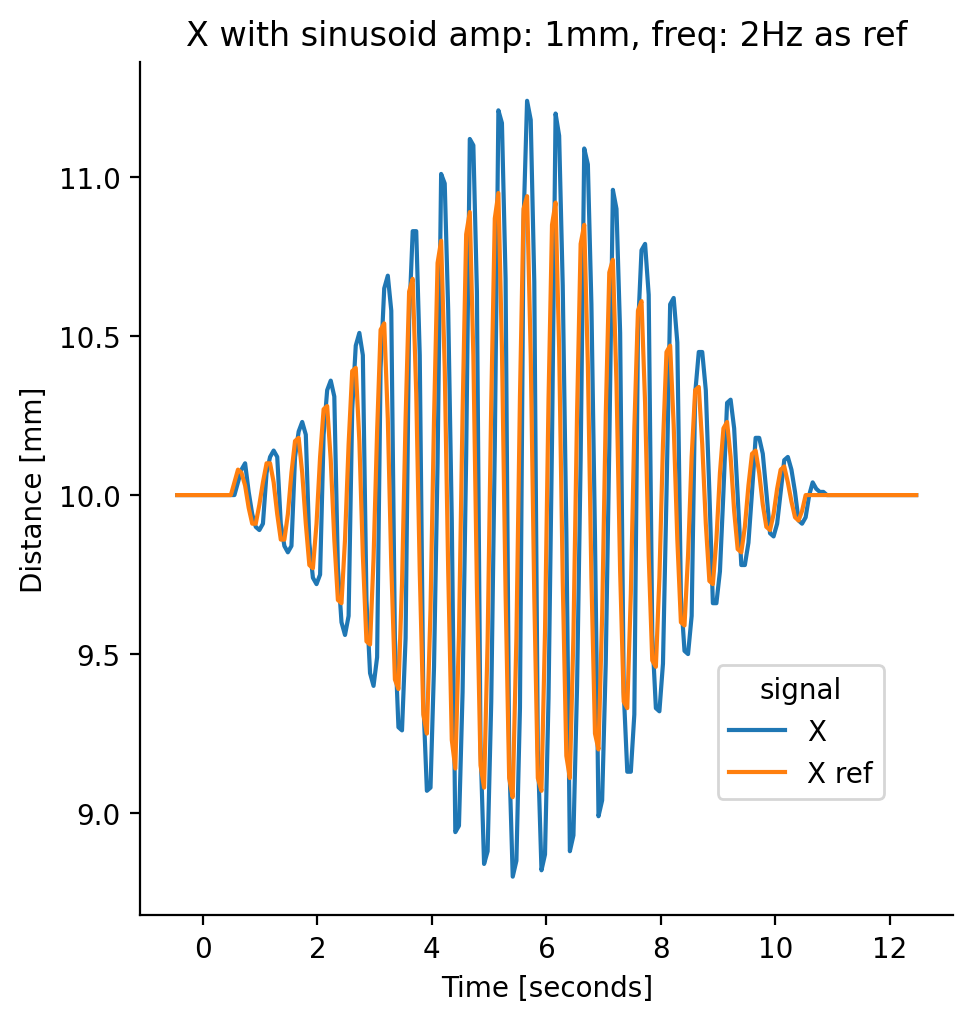

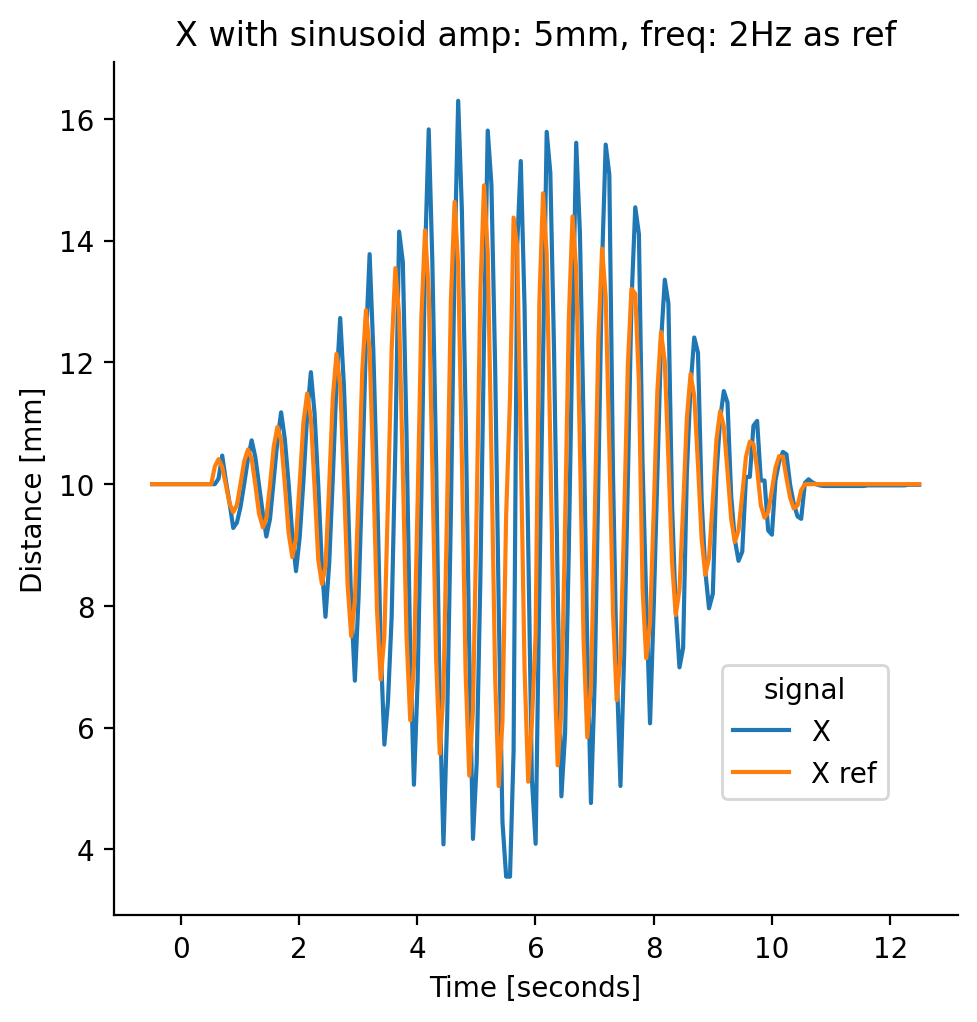

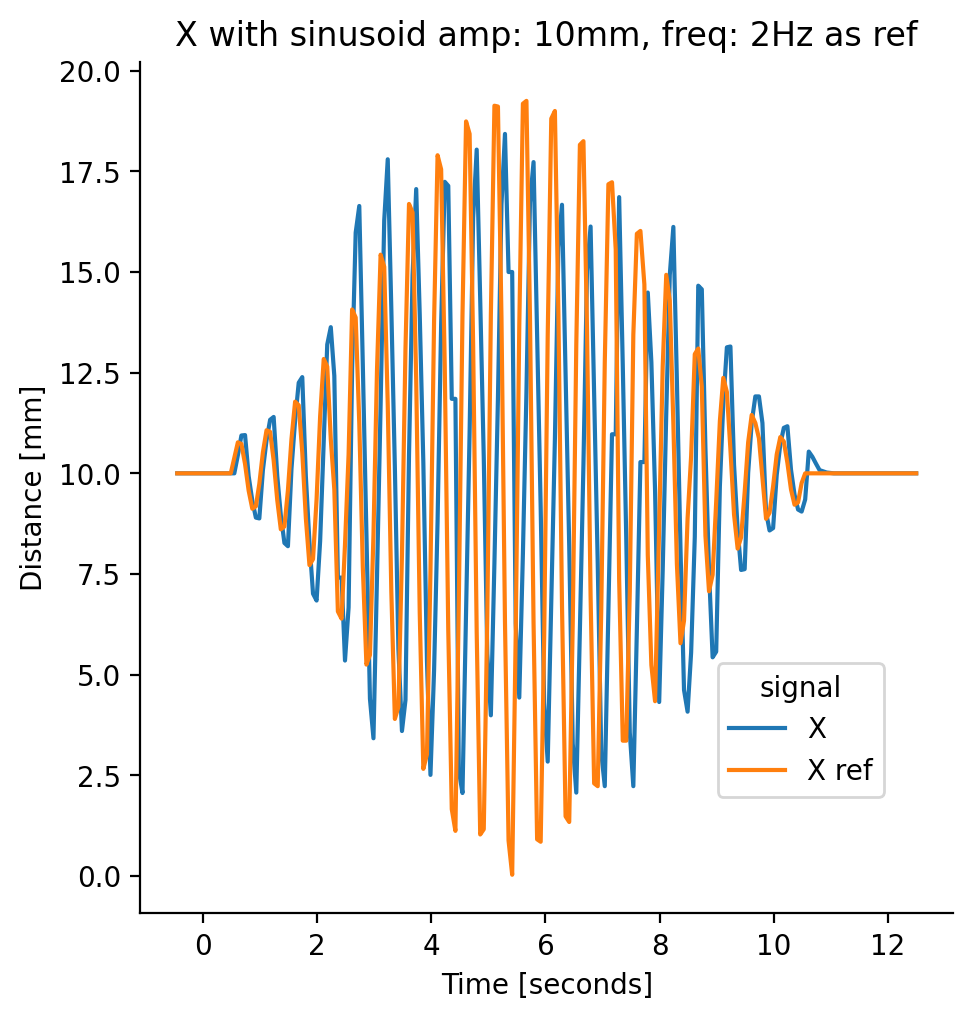

In [264]:
msex = []
for i in range(12):
    ti = 22 + 15*i
    tf = 35 + 15*i
    new_data1['step_shifted_time'] = new_data1['times'] - (ti+0.5) # Correr el eje del tiempo 13 unidades a la derecha

    a4_dims = (5, 5)
    p = sns.relplot(data=new_data1.loc[((new_data1['signal'] == 'X') | (new_data1['signal'] == 'X ref')) & (new_data1['times'] > ti) & (new_data1['times'] < tf)], kind="line", x='step_shifted_time', y='value', hue='signal')
    p.fig.set_dpi(200)
    sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)
    
    d2 = data1.loc[(data1['times'] > ti) & (data1['times'] < tf)]
    msex.append(mean_squared_error(d2['x_ref'], d2['x']))
    
    amps = [1, 5, 10]
    freqs = [0.5, 1, 2, 4]
    plt.title(f'X with sinusoid amp: {amps[i%3]}mm, freq: {freqs[i//4]}Hz as ref')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Distance [mm]')
    plt.savefig(f'x_sin{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [263]:
mse

[0.004434615384615402,
 0.055203827751196116,
 0.27109567307692284,
 0.010780769230769226,
 0.2545665071770335,
 0.9560212560386472,
 0.024420192307692316,
 0.573633173076923,
 2.0415210526315786,
 0.14969759615384617,
 4.17186889952153,
 27.718502415458936]

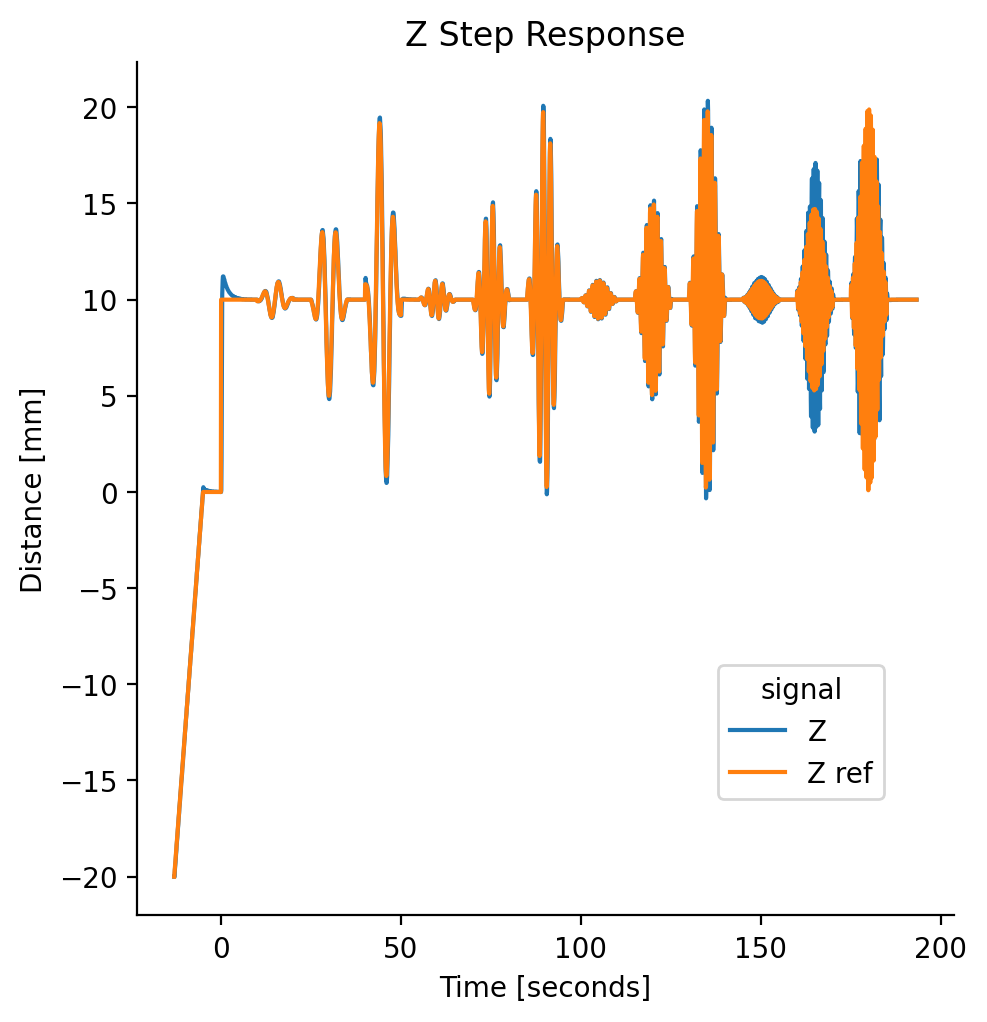

In [151]:
new_data2['step_shifted_time'] = new_data2['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data2.loc[(new_data2['signal'] == 'Z') | (new_data2['signal'] == 'Z ref')], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Z Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.show()

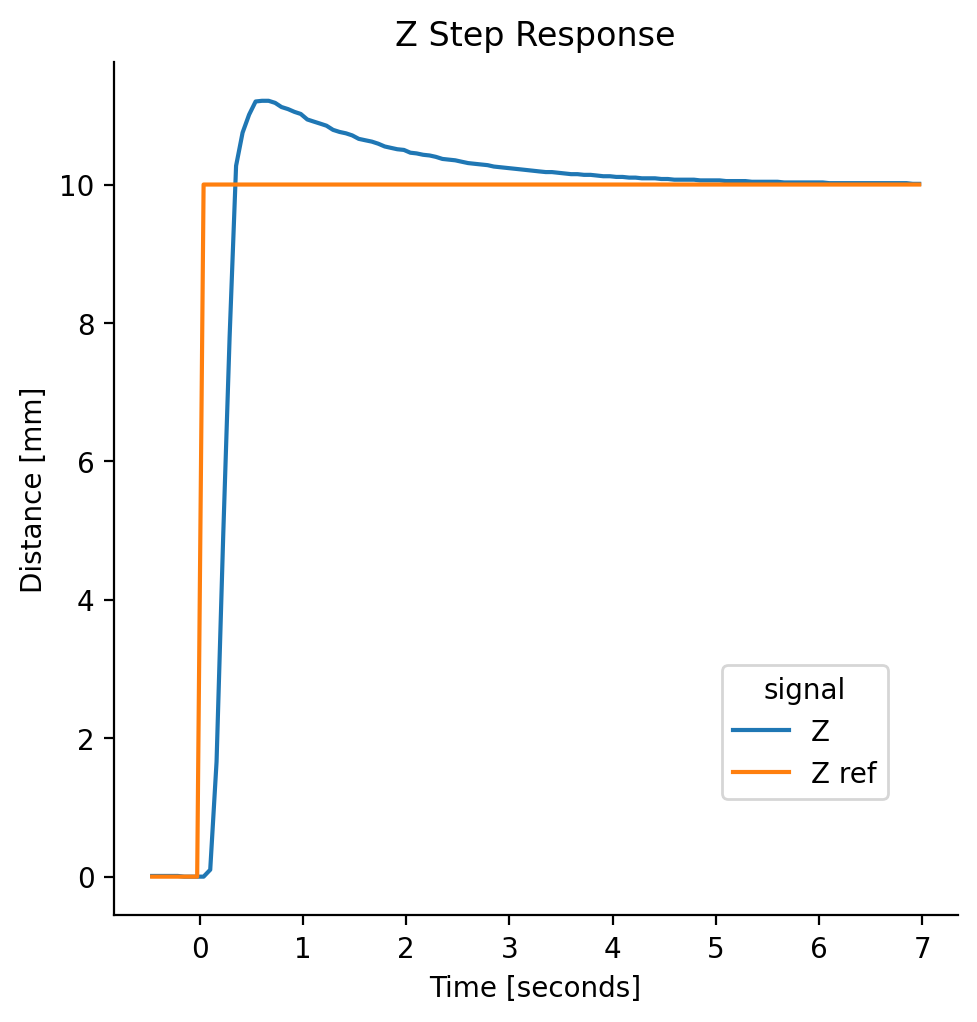

In [152]:
new_data2['step_shifted_time'] = new_data2['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data2.loc[((new_data2['signal'] == 'Z') | (new_data2['signal'] == 'Z ref')) & (new_data2['times'] > 12.5) & (new_data2['times'] < 20)], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Z Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.savefig('z_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

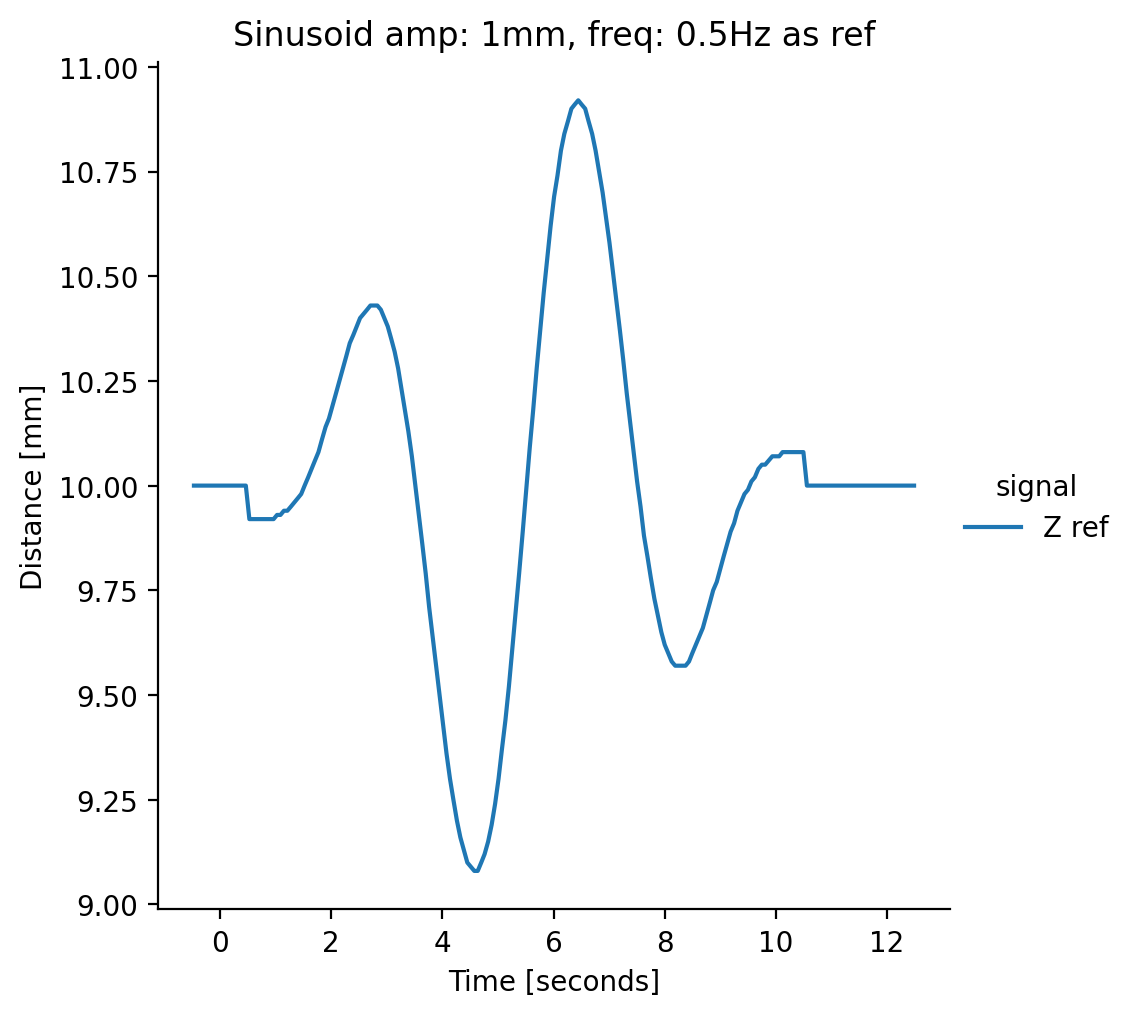

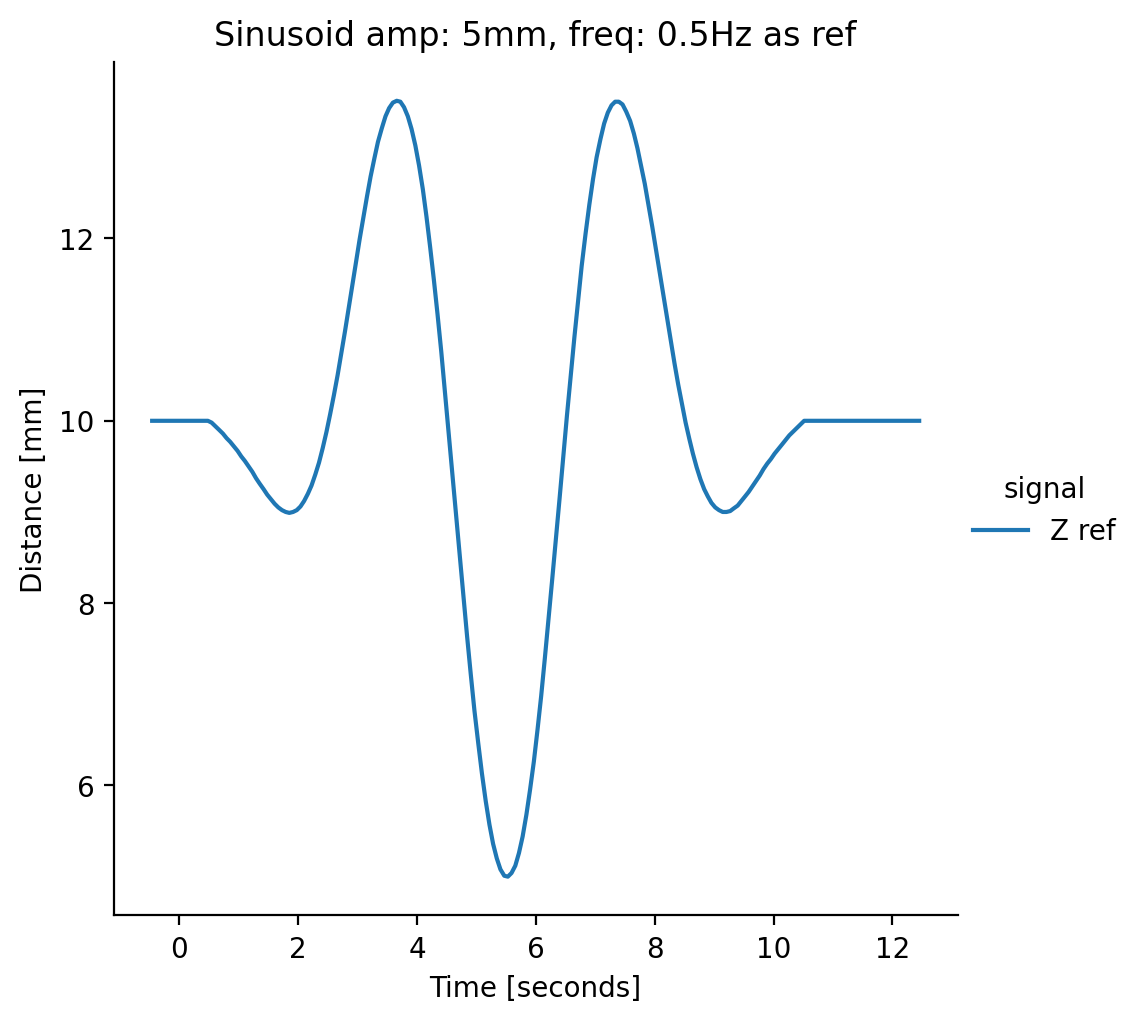

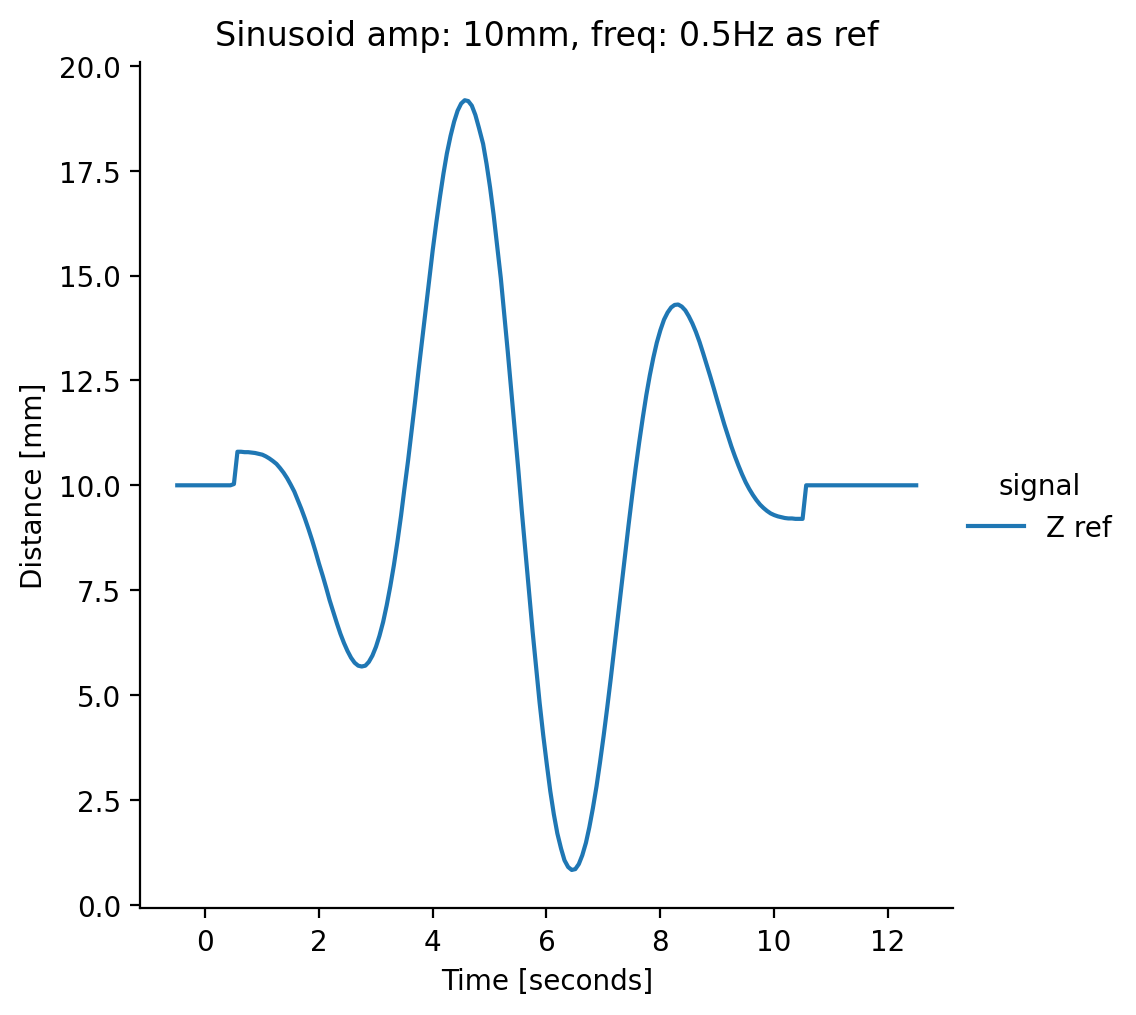

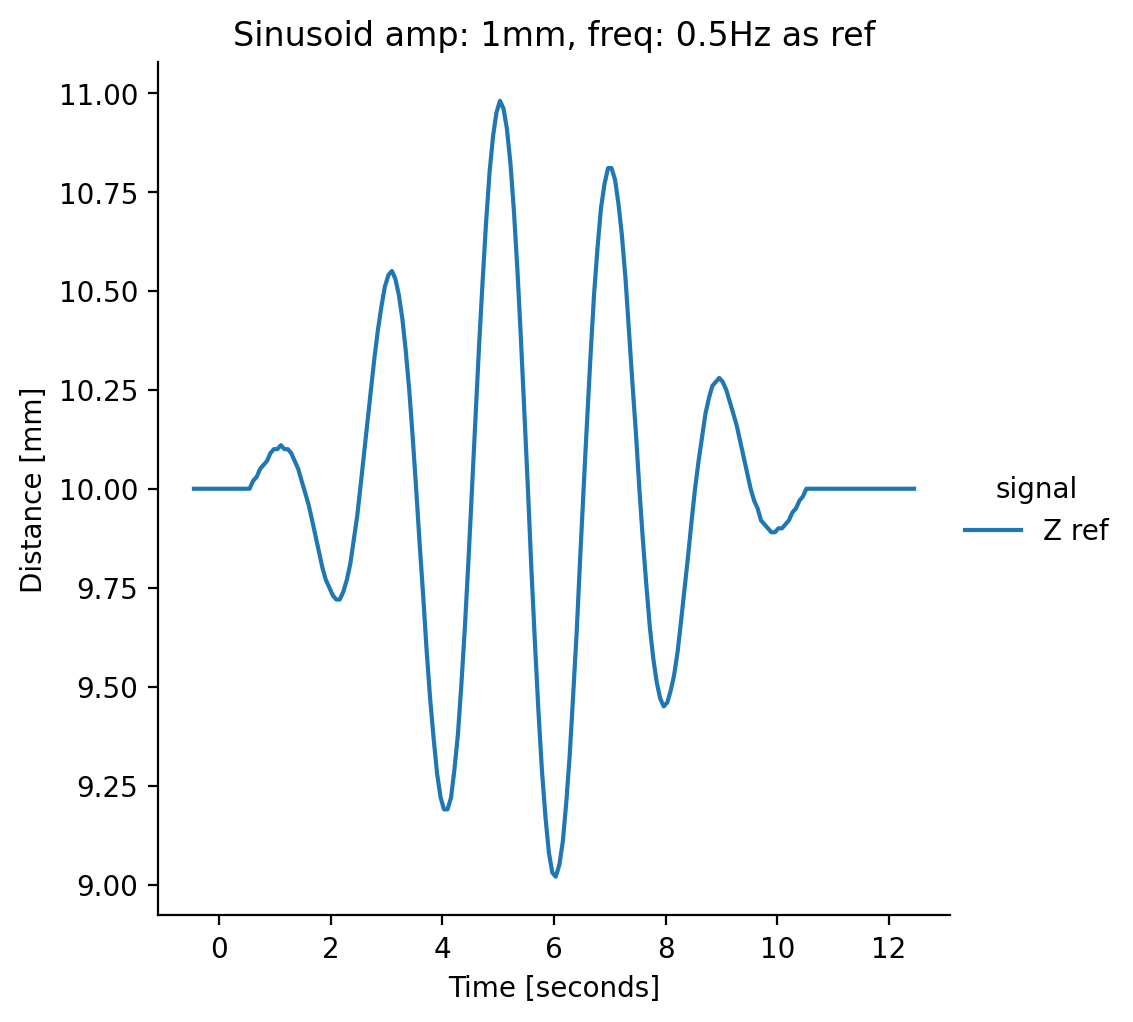

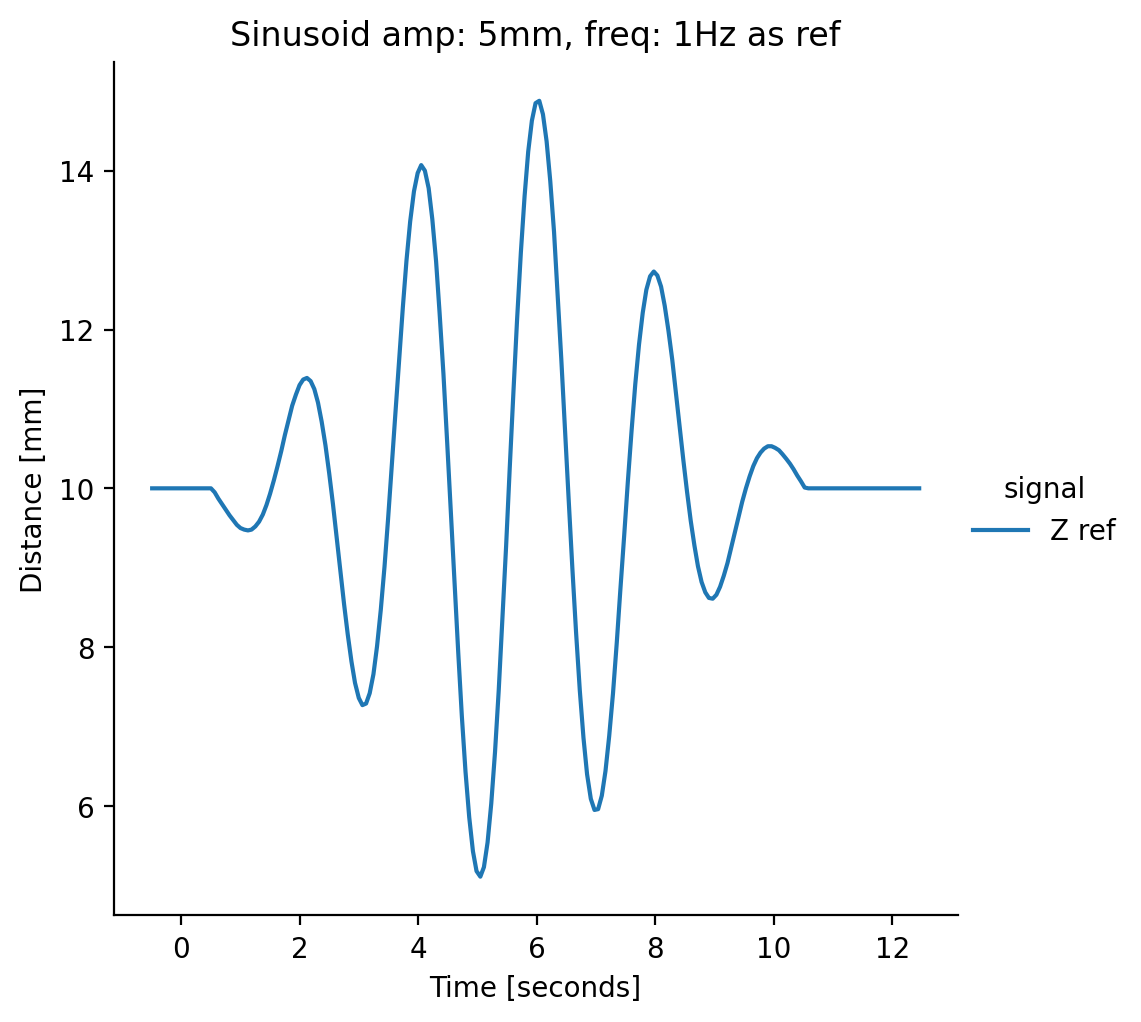

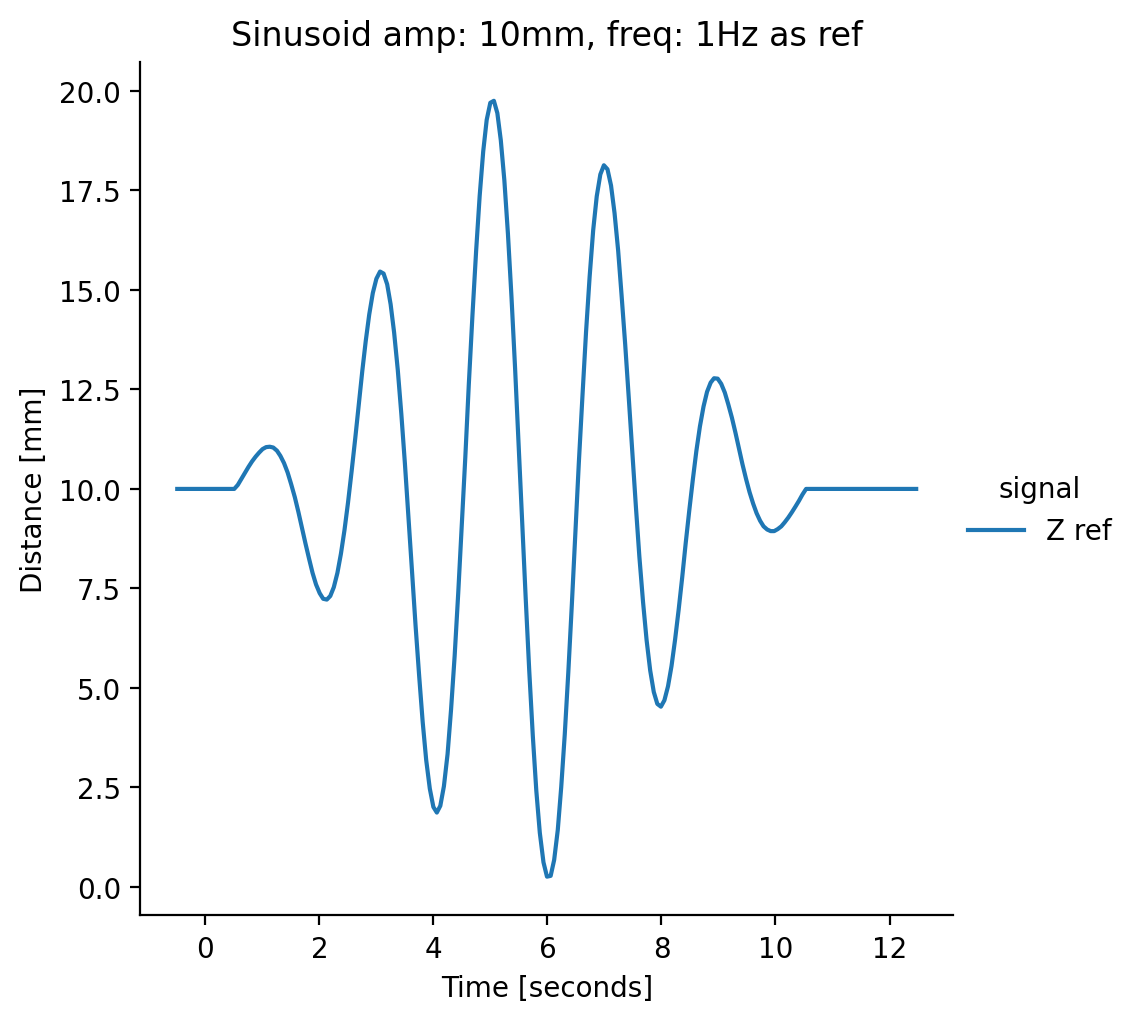

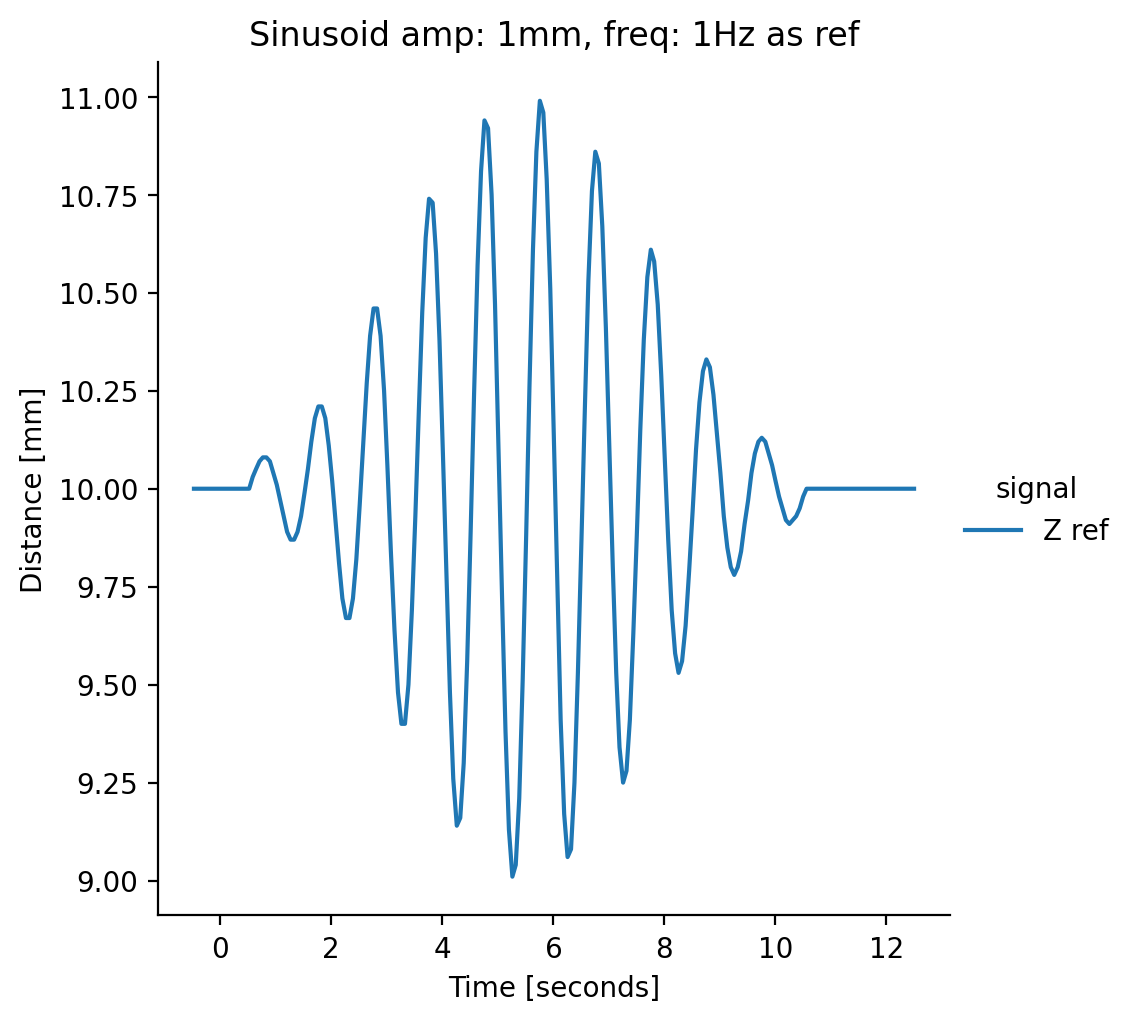

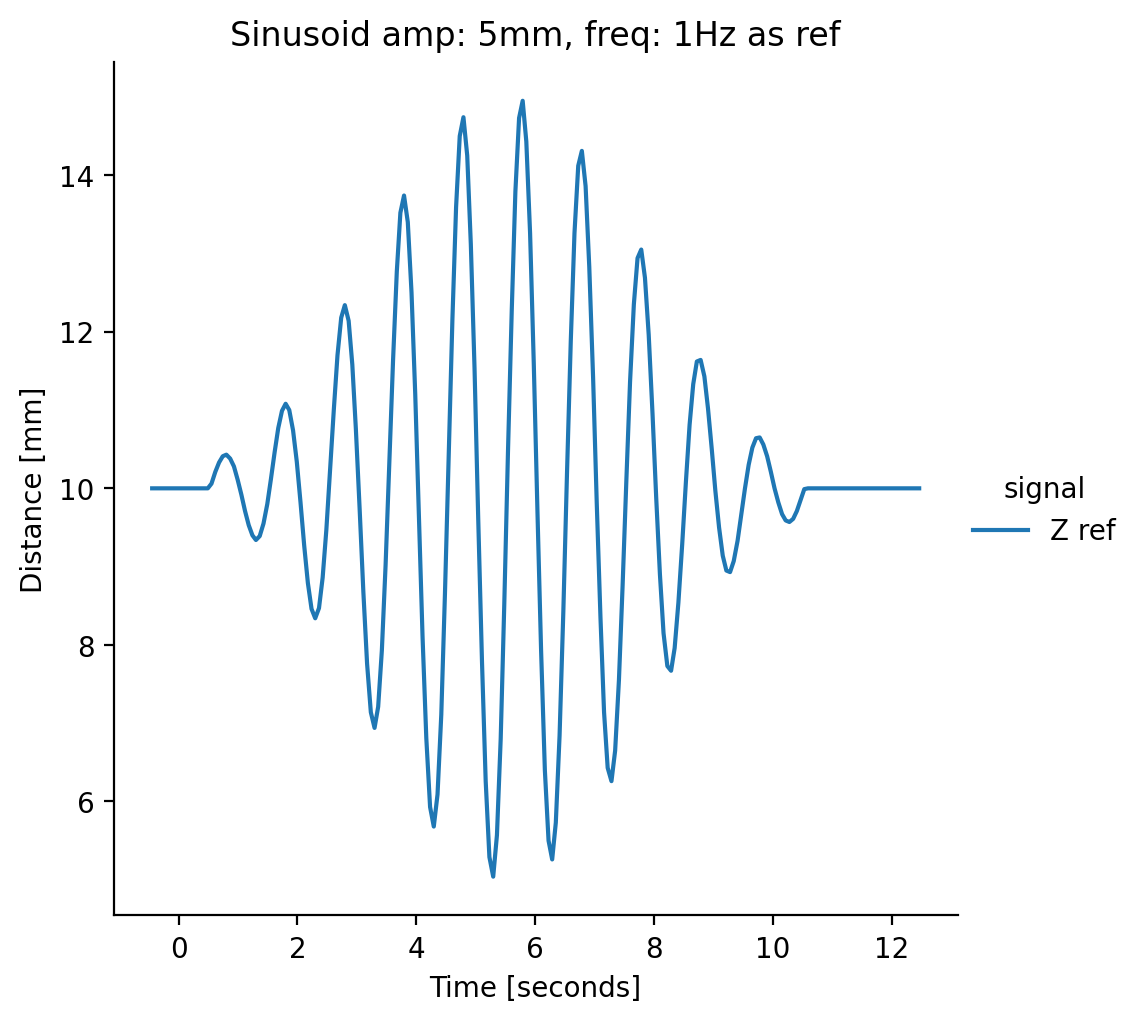

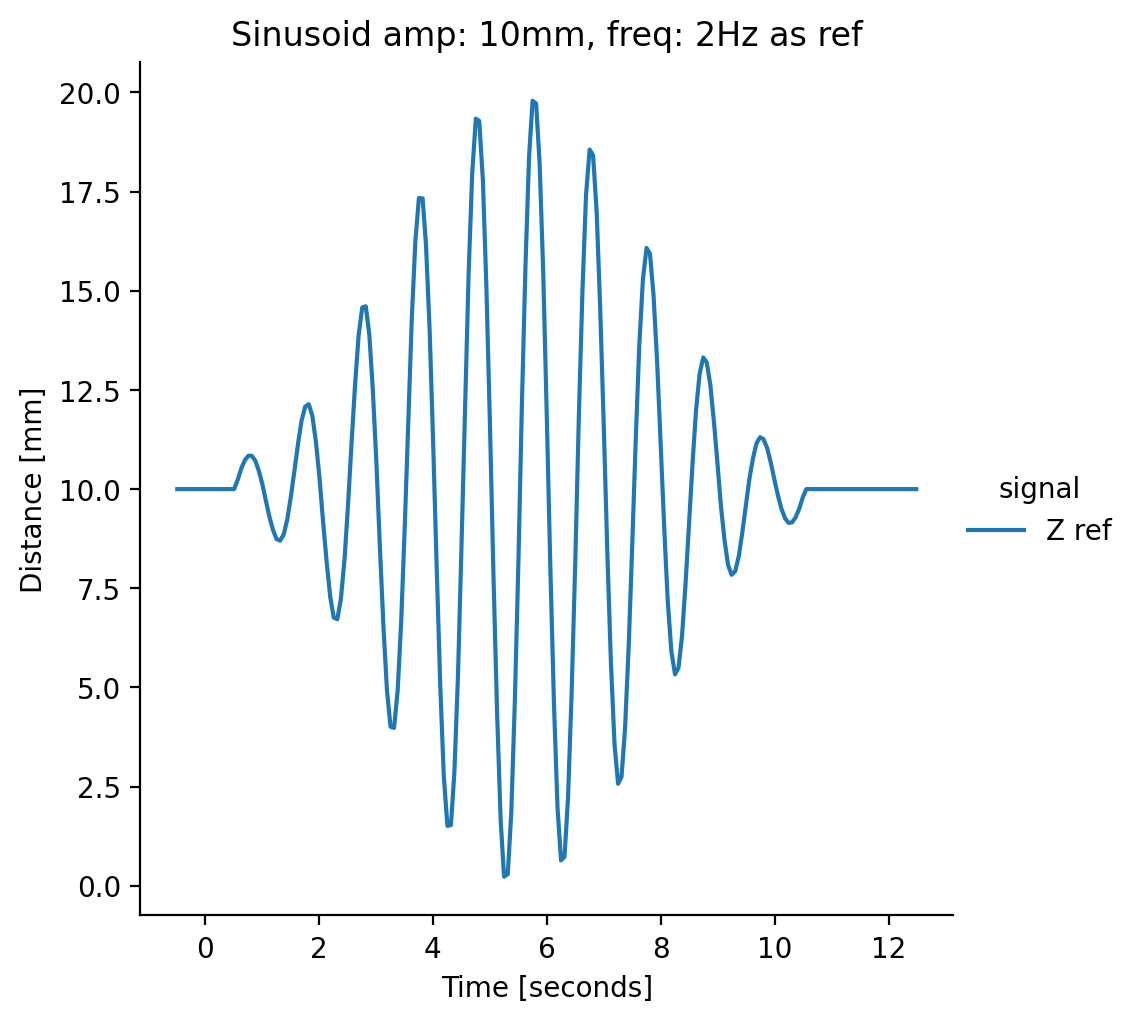

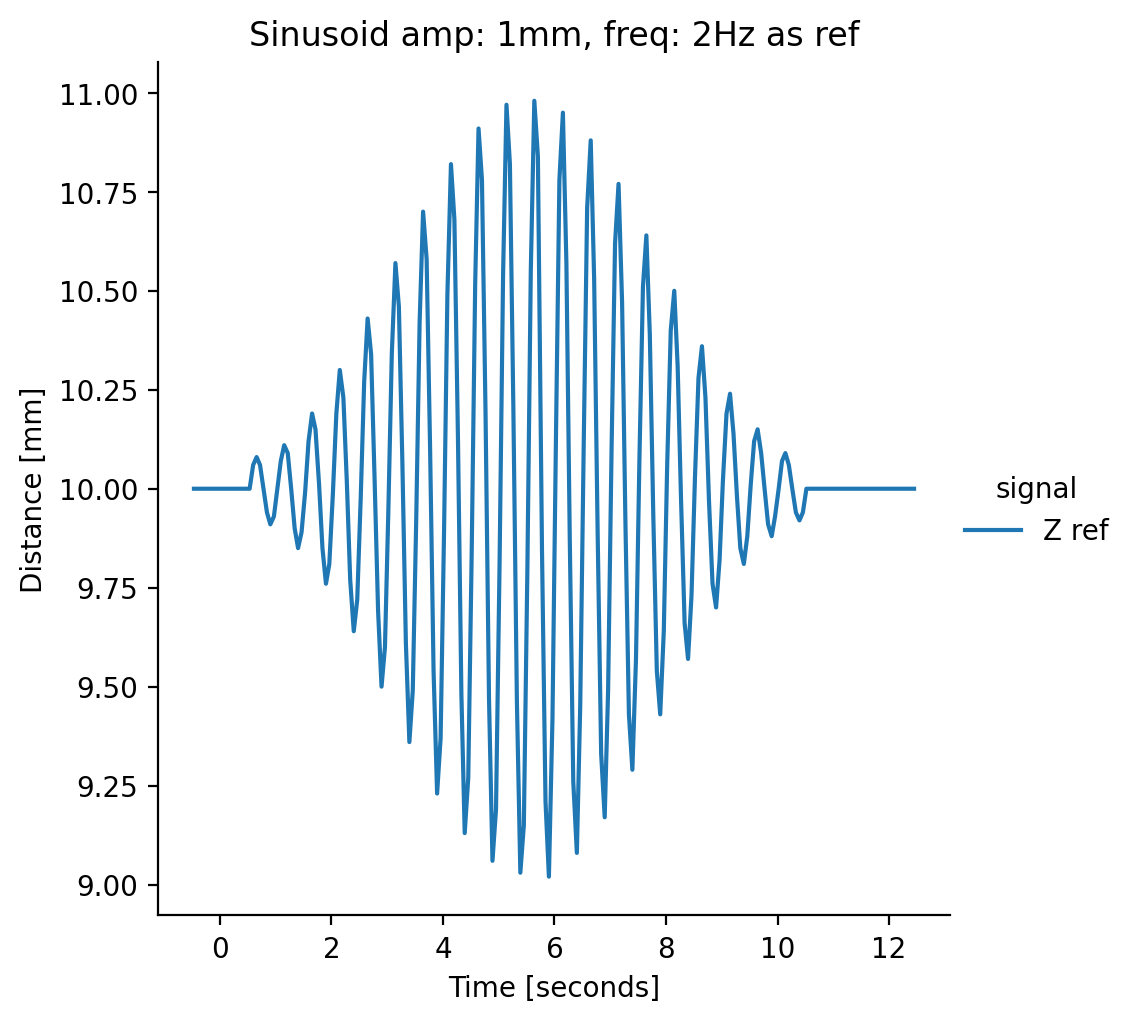

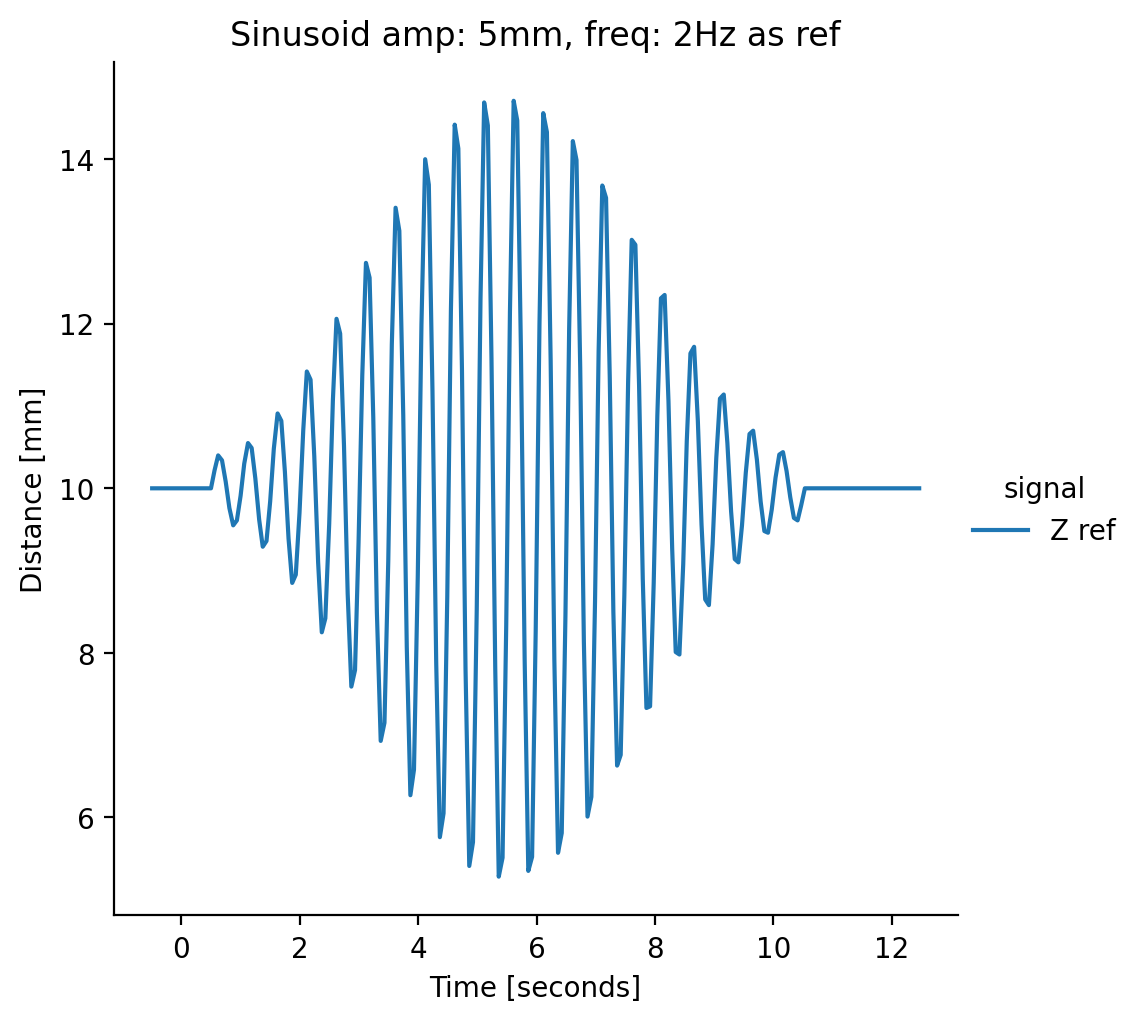

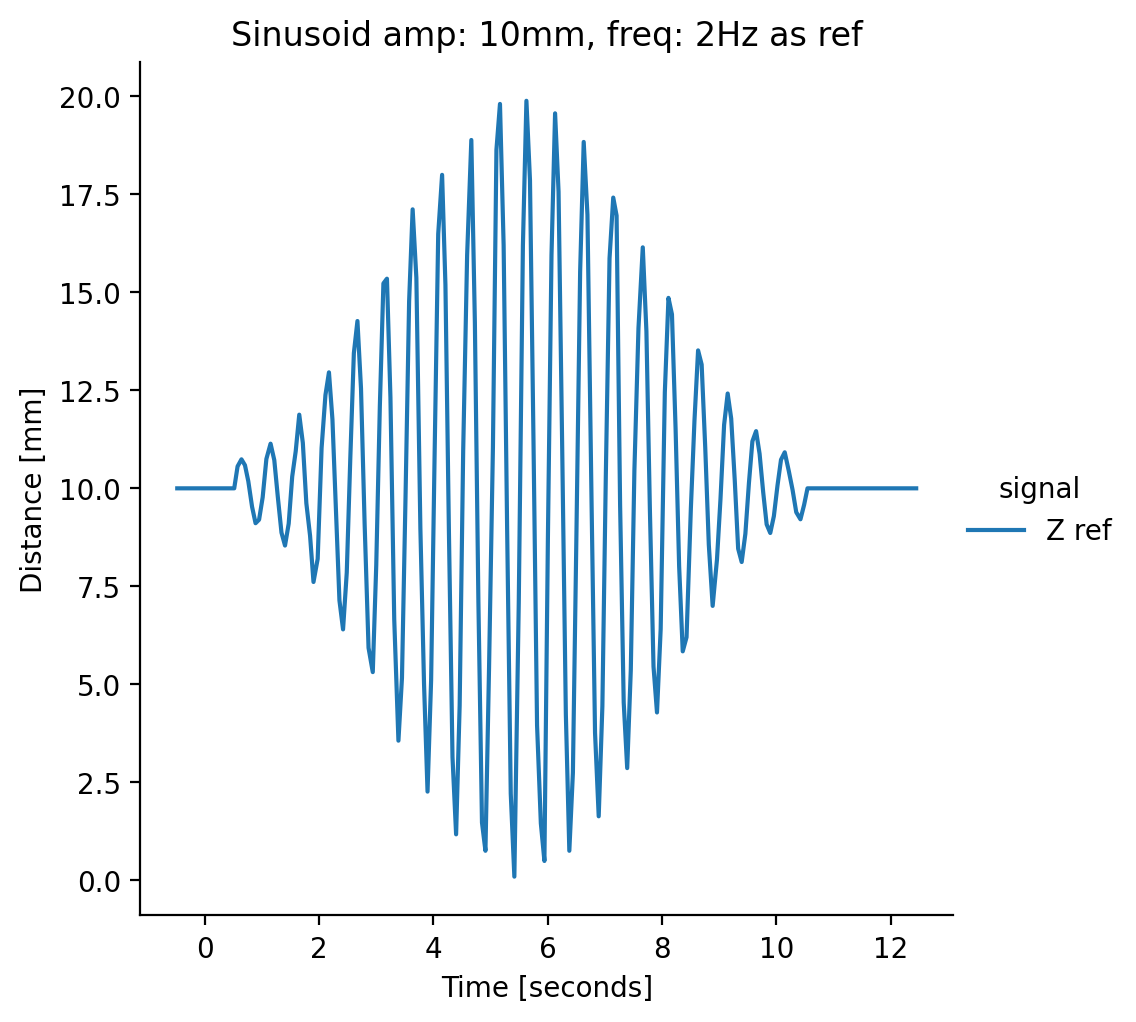

In [307]:
msez = []
for i in range(12):
    ti = 22 + 15*i
    tf = 35 + 15*i
    new_data2['step_shifted_time'] = new_data2['times'] - (ti+0.5) # Correr el eje del tiempo 13 unidades a la derecha

    a4_dims = (5, 5)
    p = sns.relplot(data=new_data2.loc[((new_data2['signal'] == 'Z ref')) & (new_data2['times'] > ti) & (new_data2['times'] < tf)], kind="line", x='step_shifted_time', y='value', hue='signal')
    p.fig.set_dpi(200)
    #sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)
    
    d2 = data2.loc[(data2['times'] > ti) & (data2['times'] < tf)]
    msez.append(mean_squared_error(d2['z_ref'], d2['z']))
    
    amps = [1, 5, 10]
    freqs = [0.5, 1, 2, 4]
    plt.title(f'Sinusoid amp: {amps[i%3]}mm, freq: {freqs[i//4]}Hz as ref')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Distance [mm]')
    plt.savefig(f'sin{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

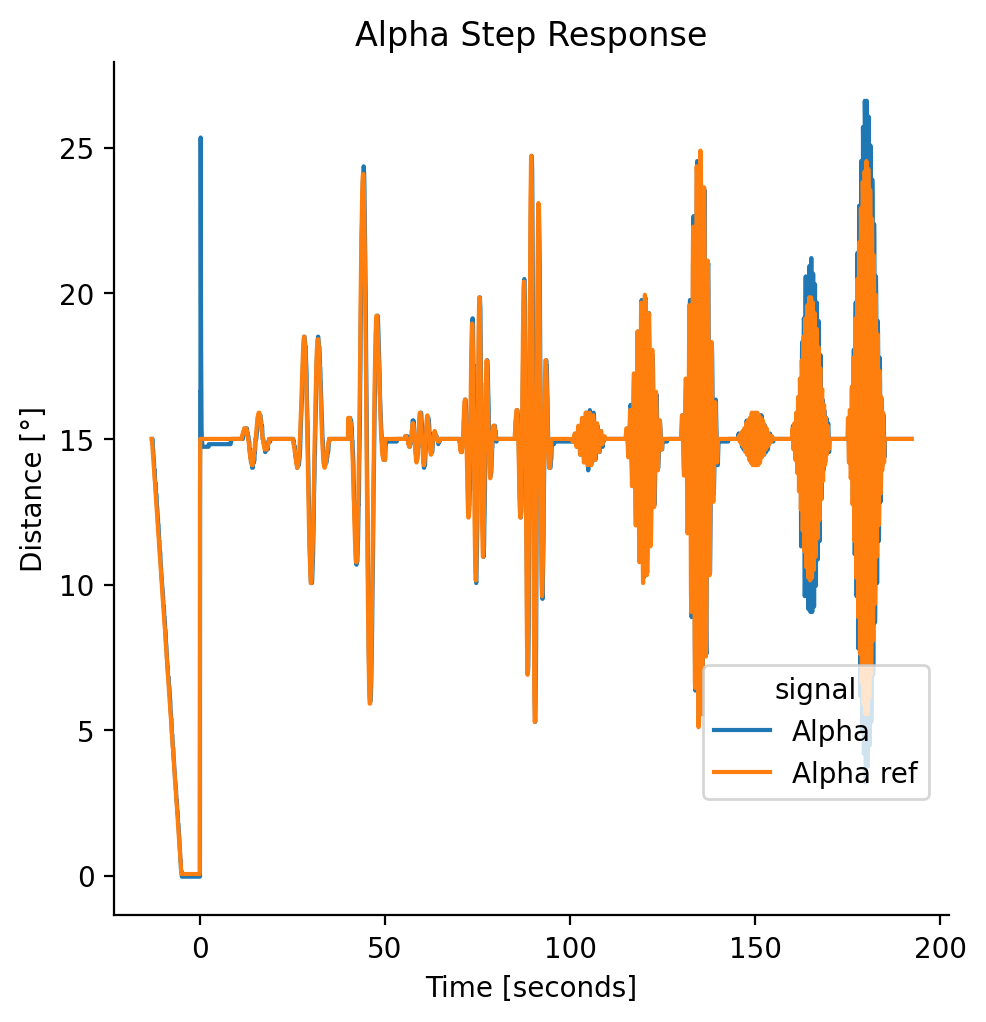

In [227]:
new_data3['step_shifted_time'] = new_data3['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data3.loc[(new_data3['signal'] == 'Alpha') | (new_data3['signal'] == 'Alpha ref')], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Alpha Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [°]')
plt.show()

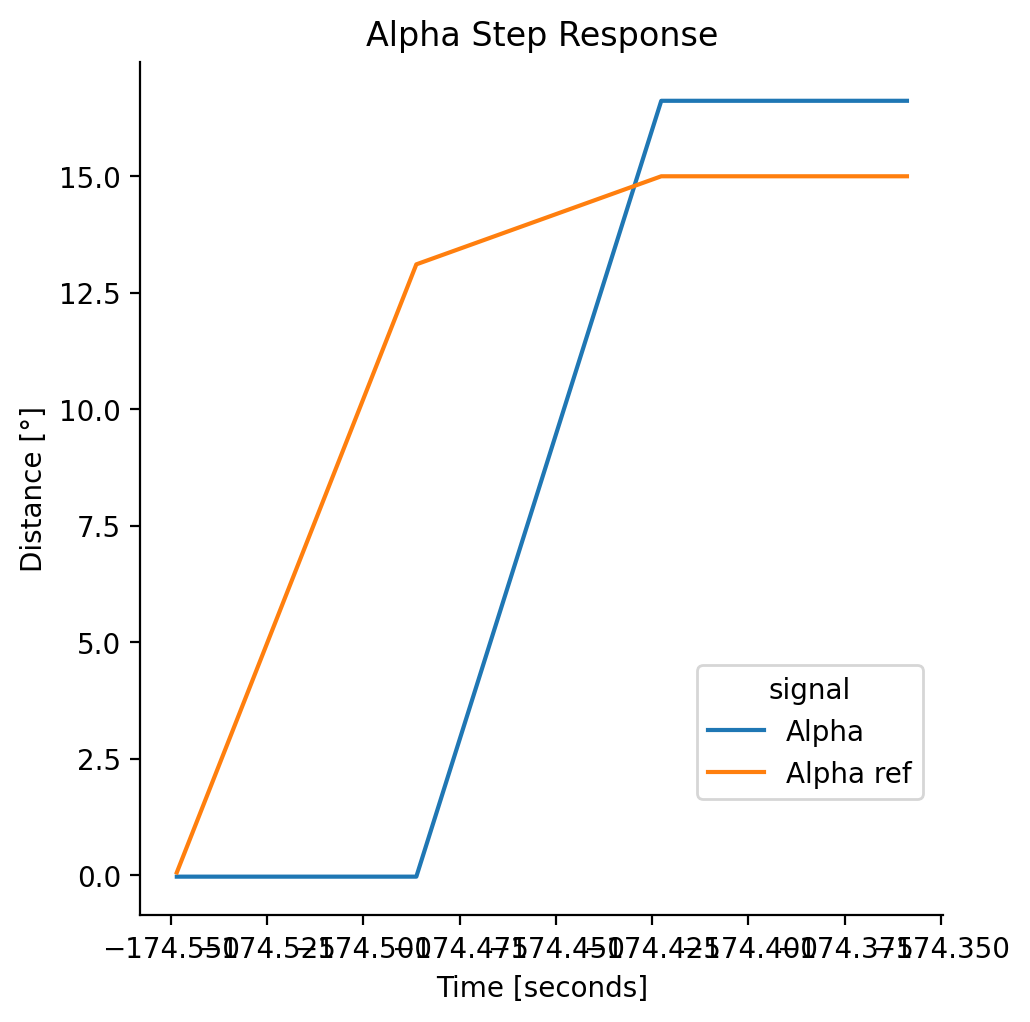

In [238]:
new_data2['step_shifted_time'] = new_data2['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data3.loc[((new_data3['signal'] == 'Alpha') | (new_data3['signal'] == 'Alpha ref')) & (new_data3['times'] > 12.9) & (new_data3['times'] < 13.2)], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Alpha Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [°]')
#plt.savefig('alpha_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

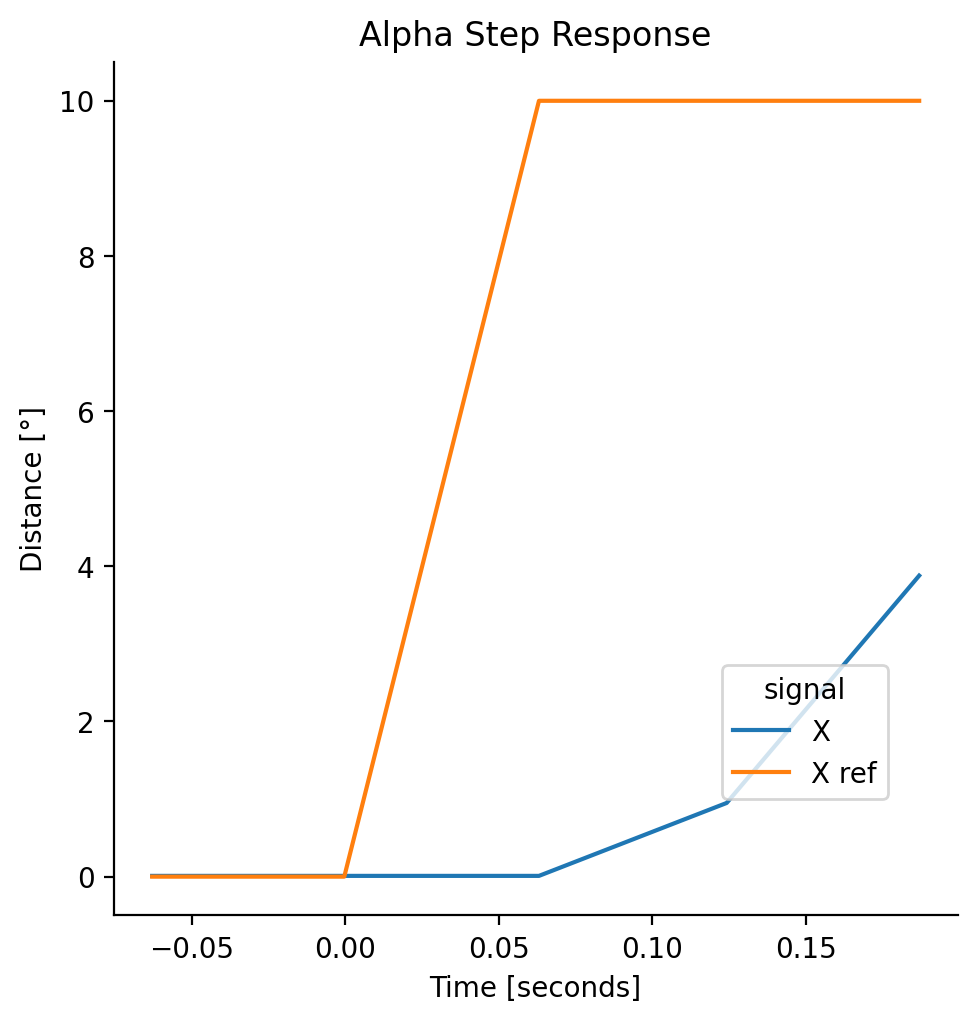

In [239]:
new_data1['step_shifted_time'] = new_data1['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data1.loc[((new_data1['signal'] == 'X') | (new_data1['signal'] == 'X ref')) & (new_data1['times'] > 12.9) & (new_data1['times'] < 13.2)], kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Alpha Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [°]')
#plt.savefig('alpha_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

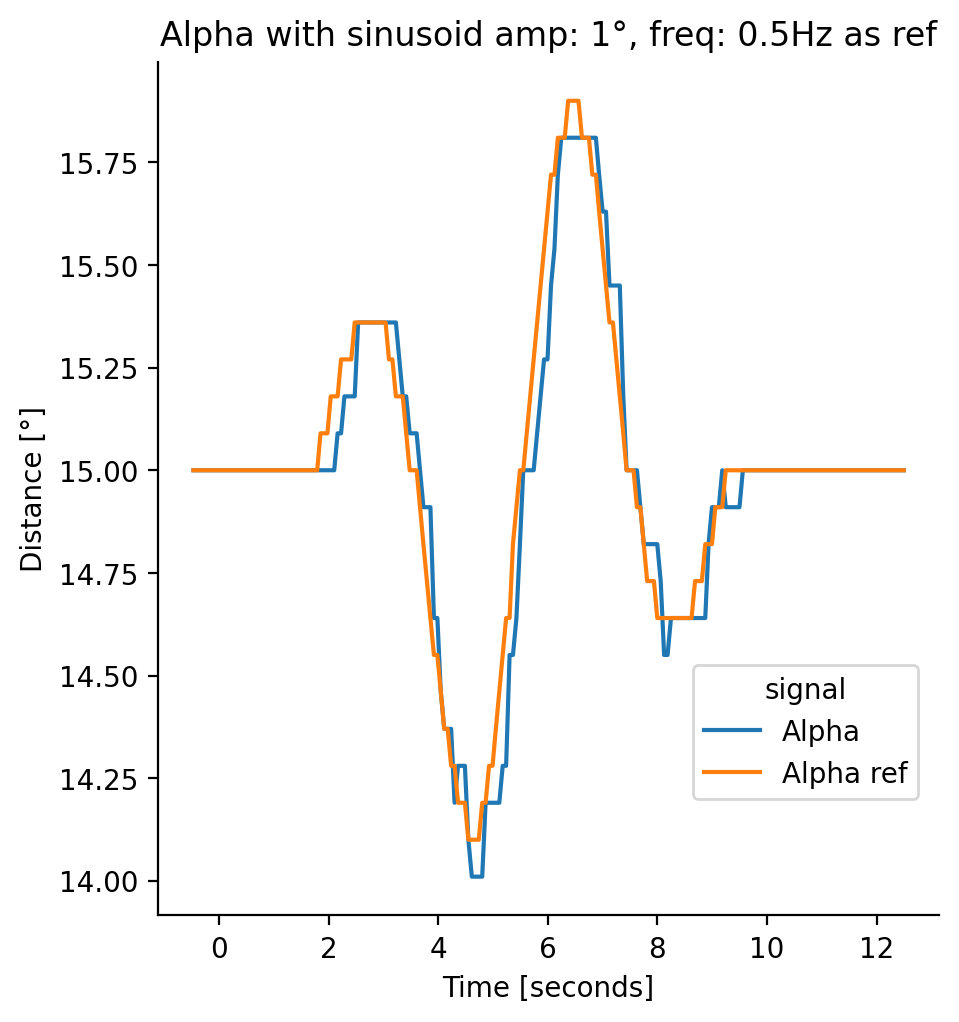

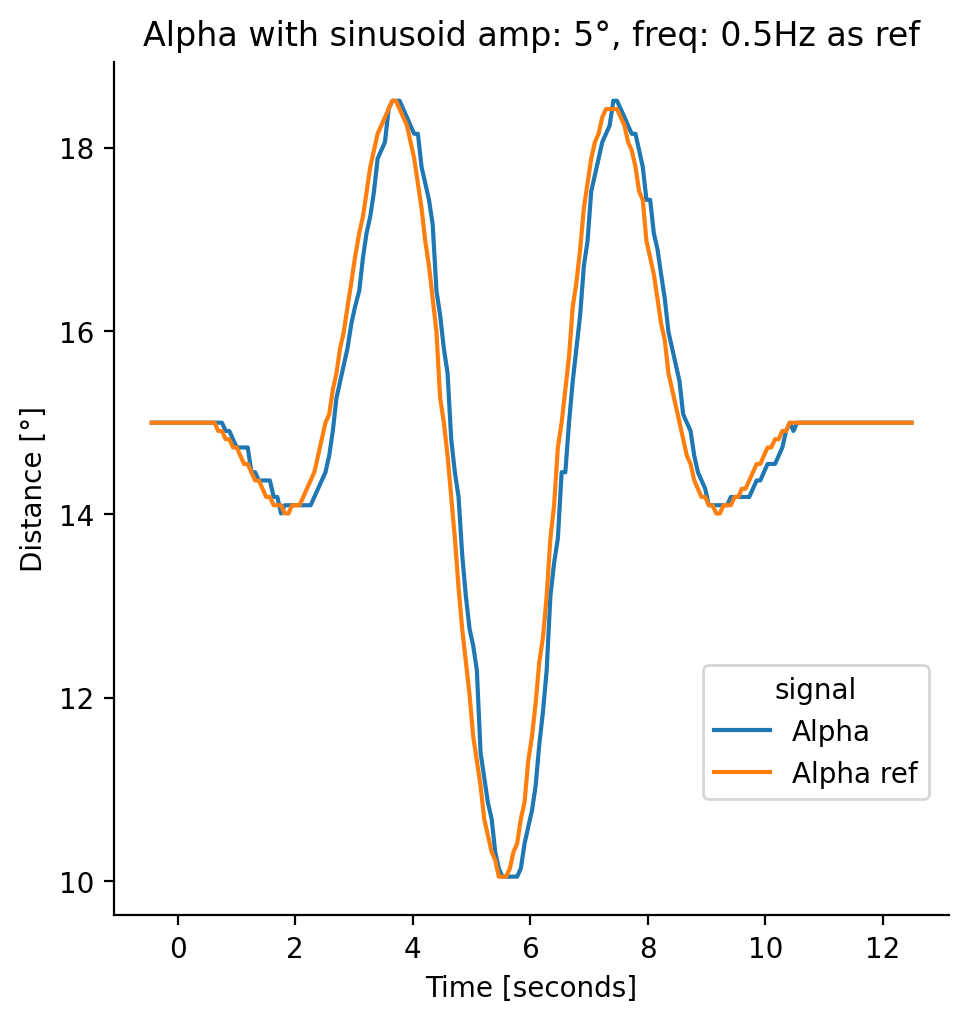

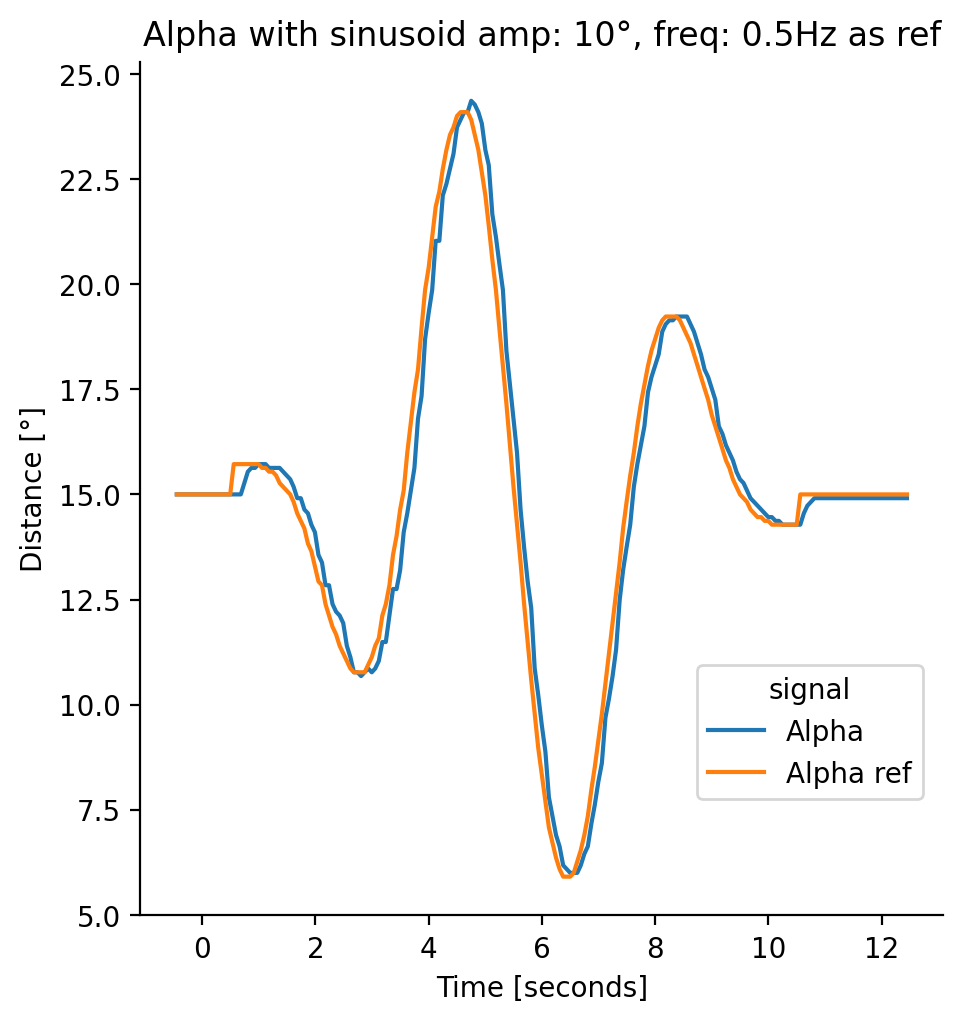

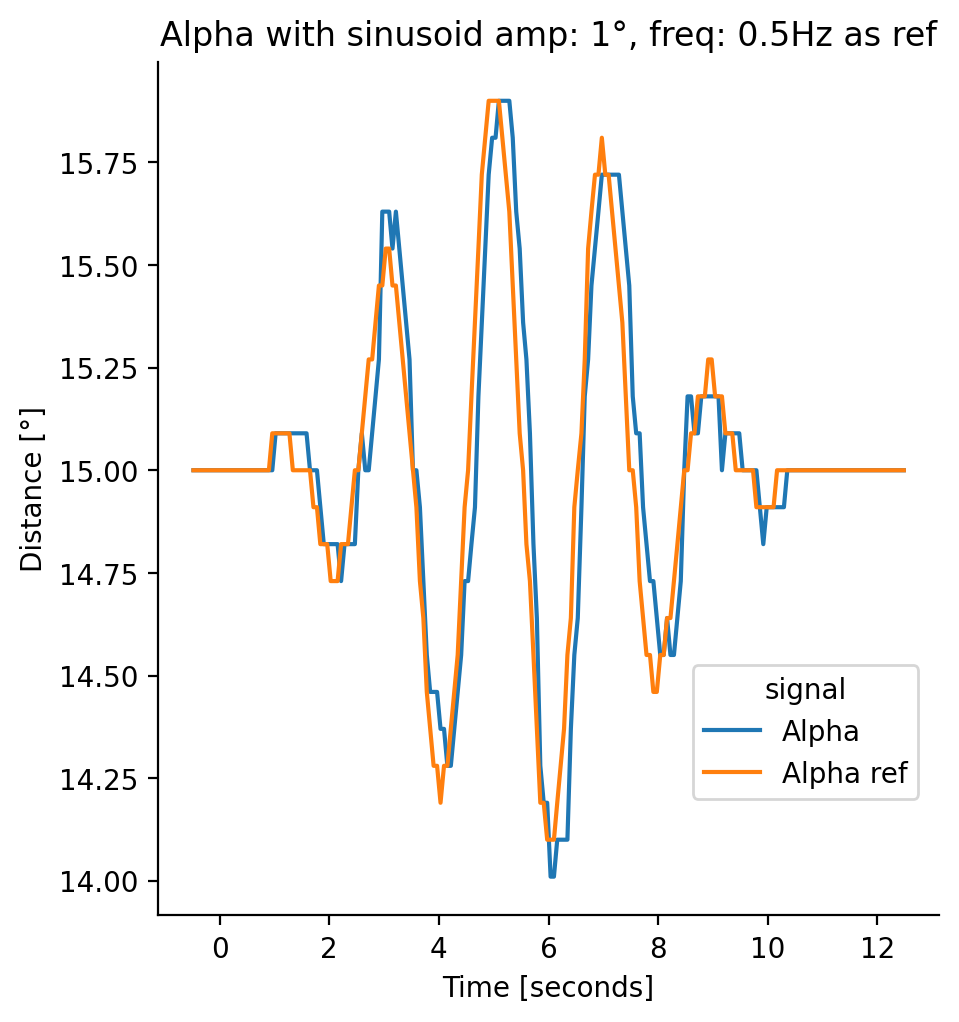

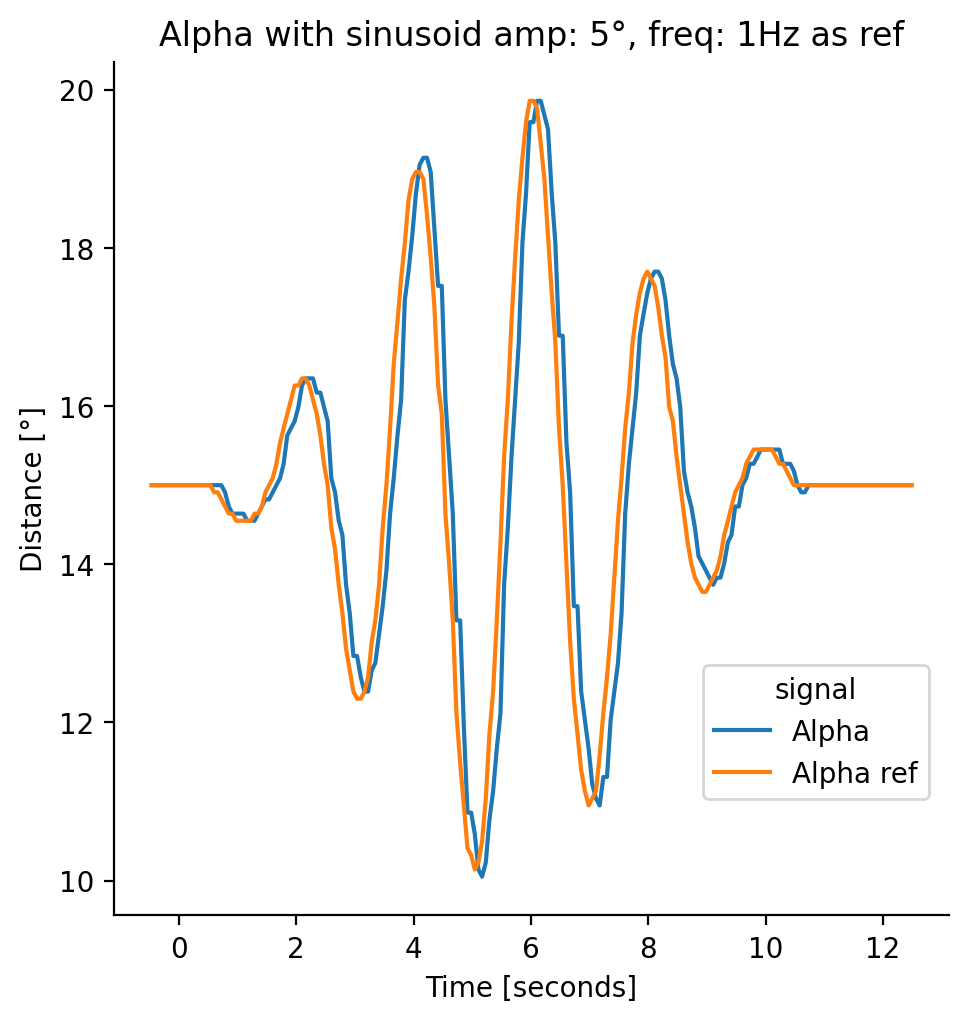

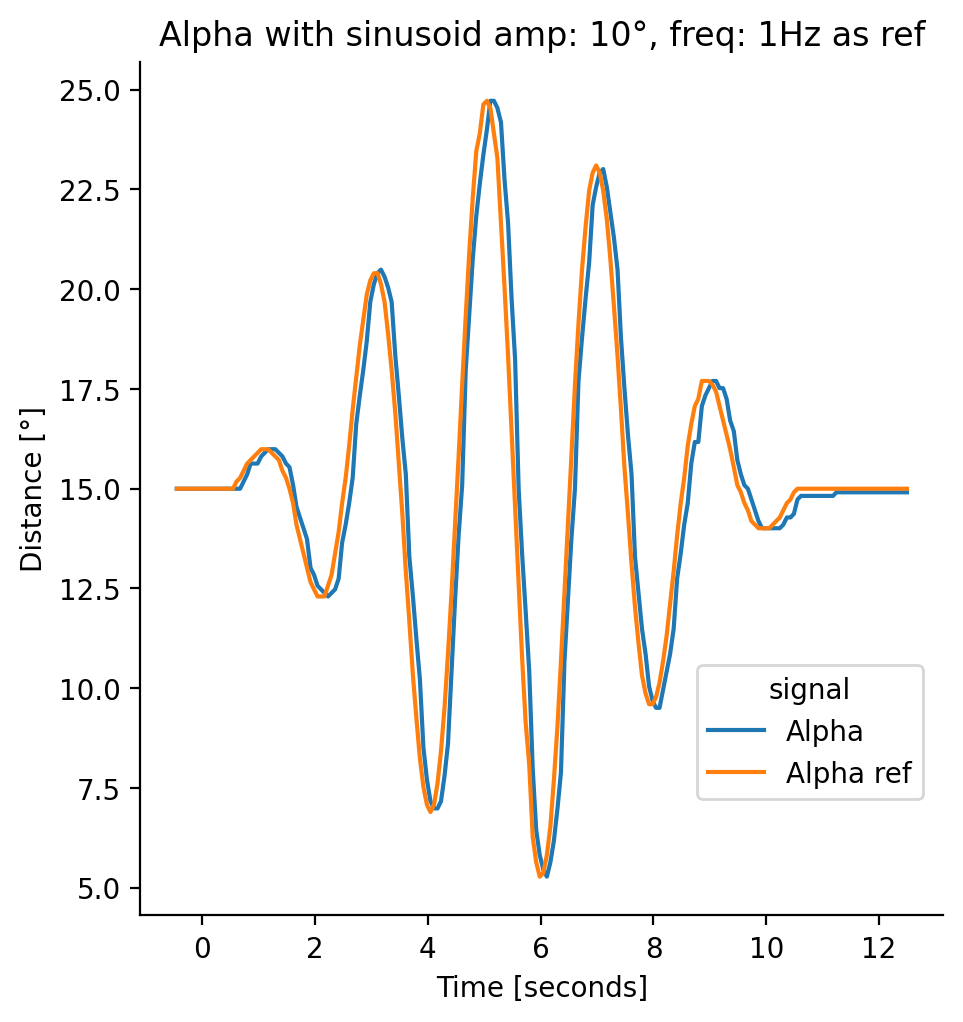

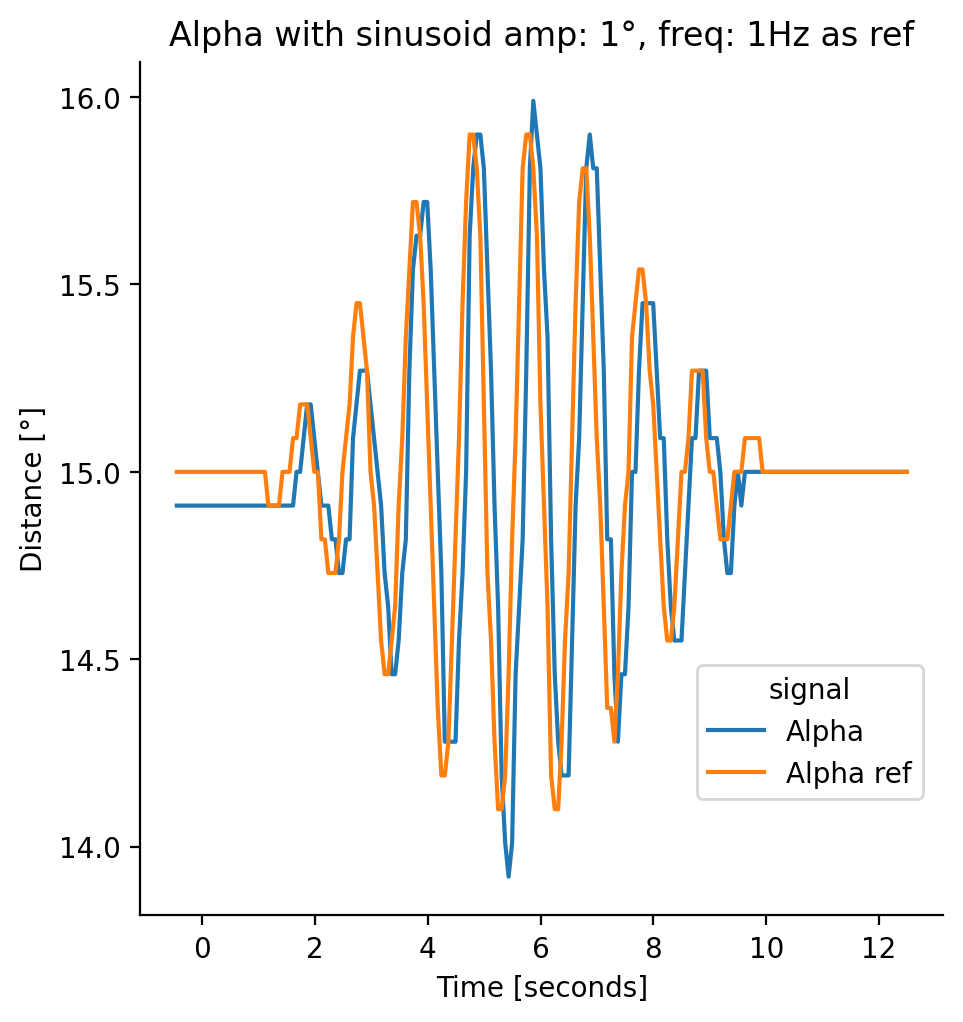

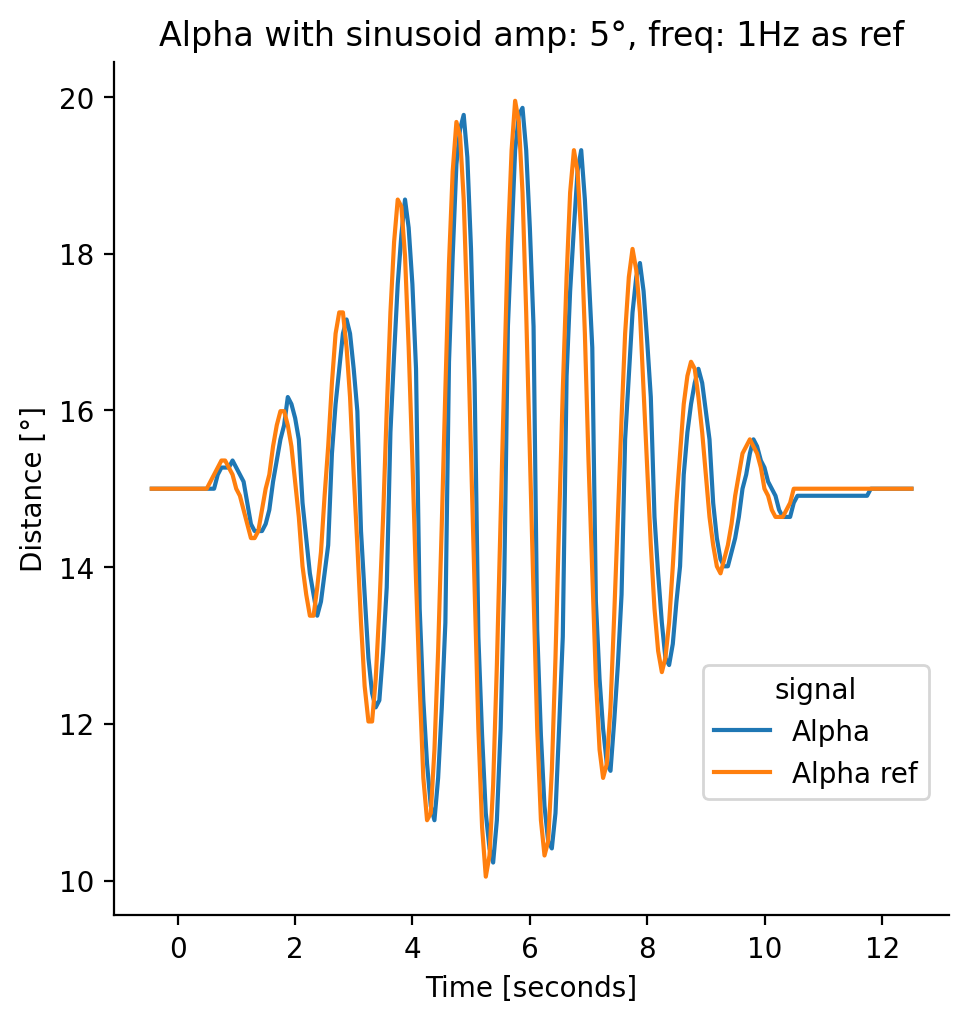

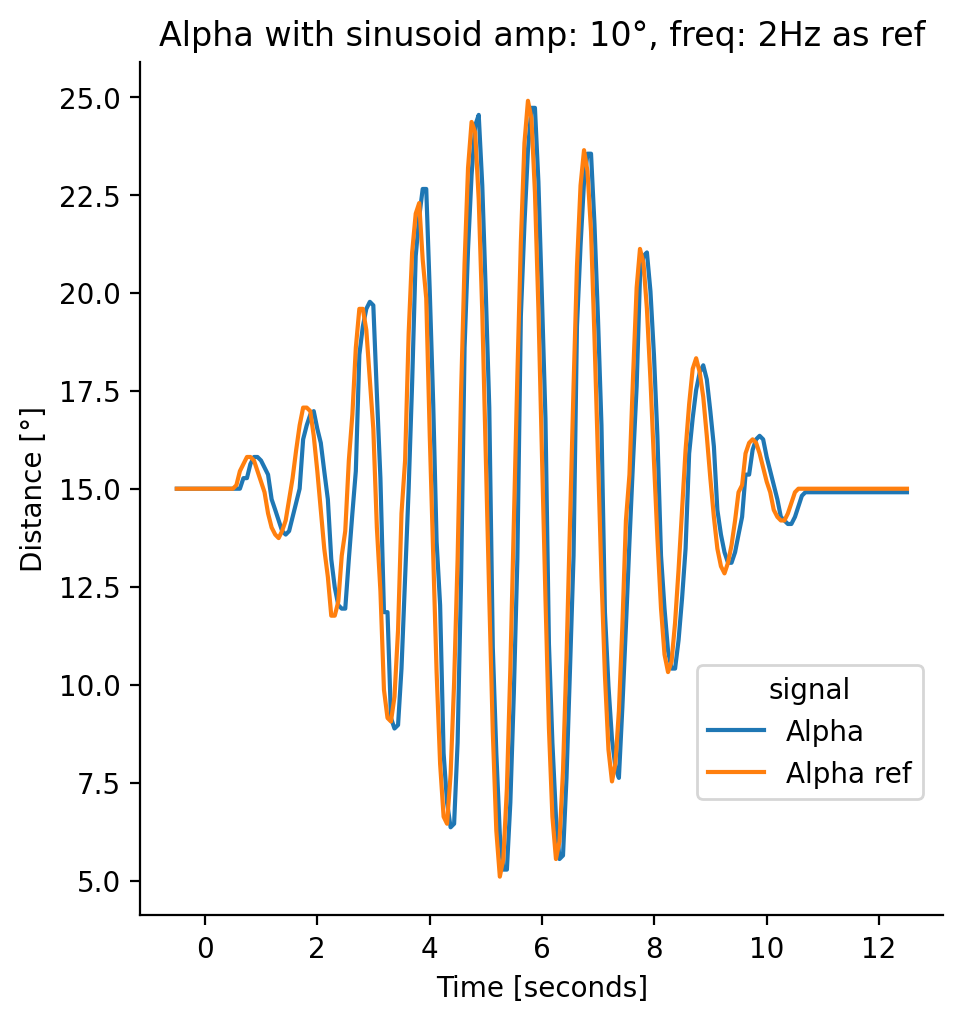

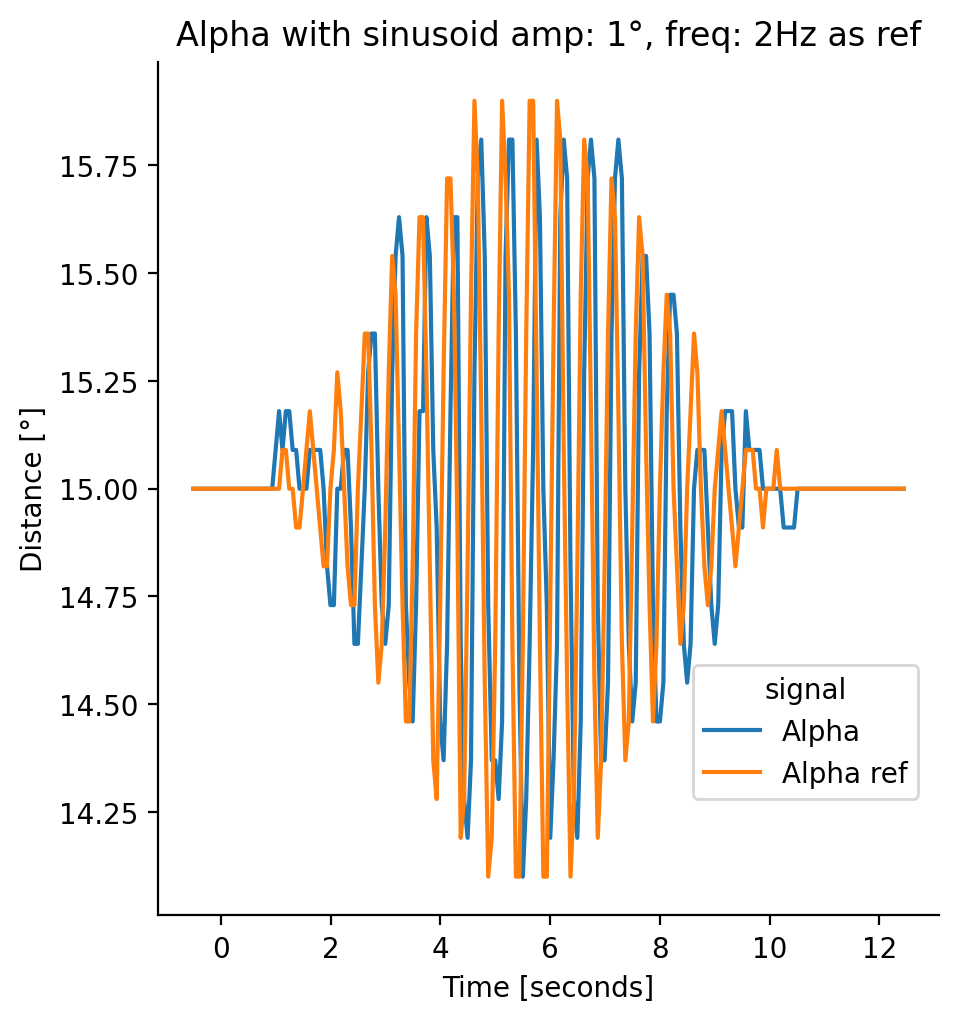

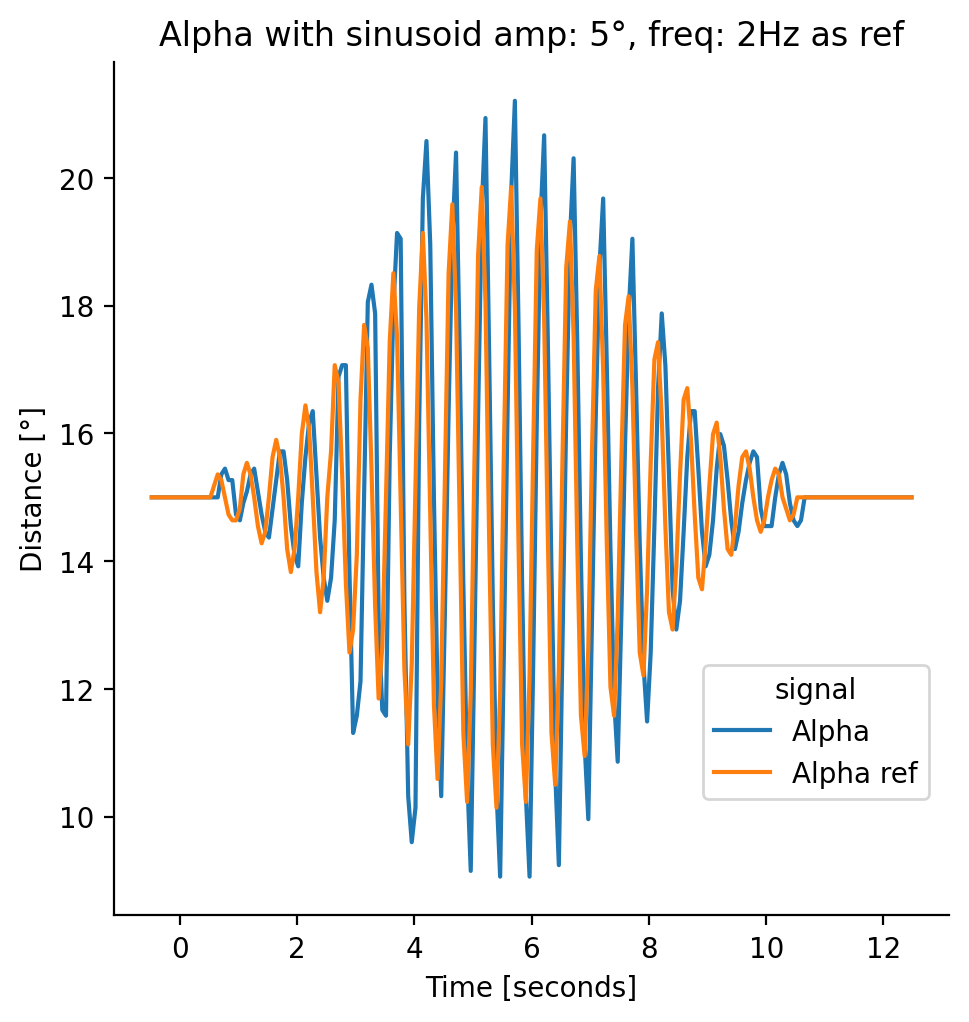

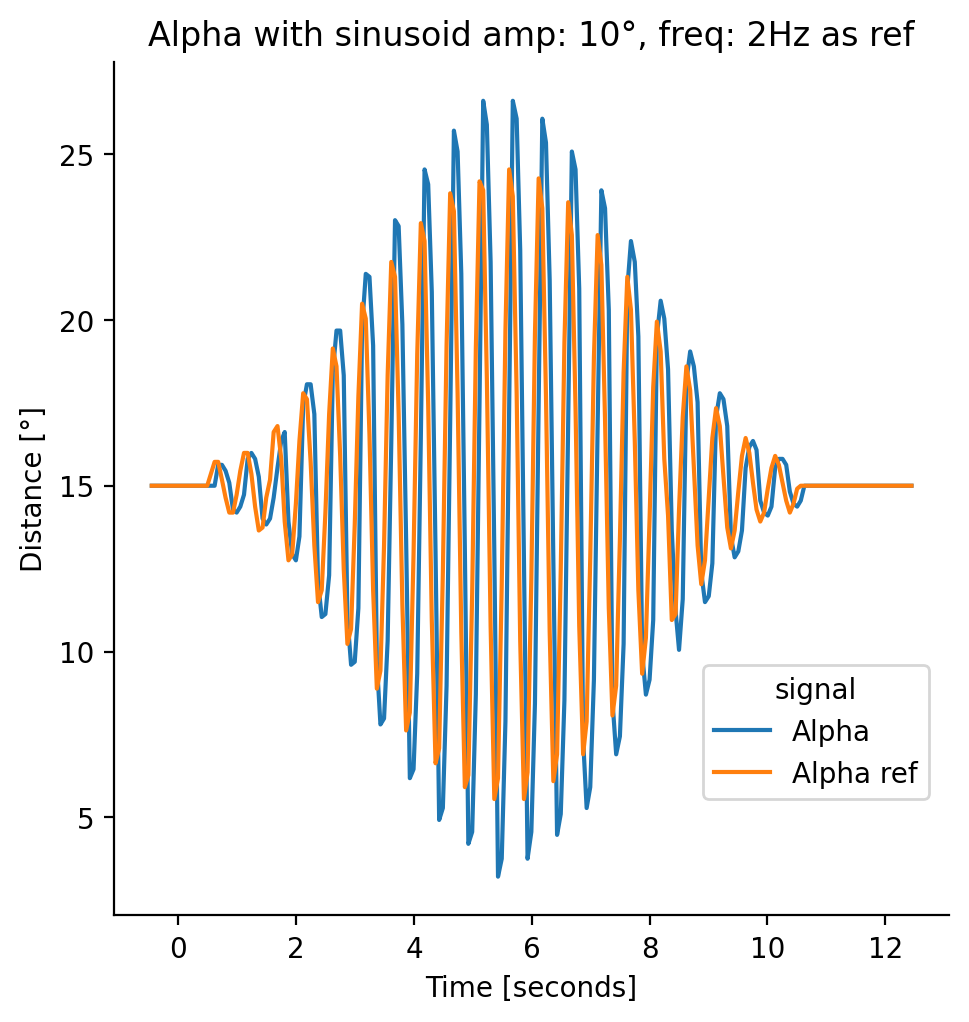

In [266]:
msealpha = []
for i in range(12):
    ti = 22 + 15*i
    tf = 35 + 15*i
    new_data3['step_shifted_time'] = new_data3['times'] - (ti+0.5) # Correr el eje del tiempo 13 unidades a la derecha

    a4_dims = (5, 5)
    p = sns.relplot(data=new_data3.loc[((new_data3['signal'] == 'Alpha') | (new_data3['signal'] == 'Alpha ref')) & (new_data3['times'] > ti) & (new_data3['times'] < tf)], kind="line", x='step_shifted_time', y='value', hue='signal')
    p.fig.set_dpi(200)
    sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)
    
    d2 = data3.loc[(data3['times'] > ti) & (data3['times'] < tf)]
    msealpha.append(mean_squared_error(d2['alpha_ref'], d2['alpha']))
    
    amps = [1, 5, 10]
    freqs = [0.5, 1, 2, 4]
    plt.title(f'Alpha with sinusoid amp: {amps[i%3]}°, freq: {freqs[i//4]}Hz as ref')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Distance [°]')
    plt.savefig(f'alpha_sin{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

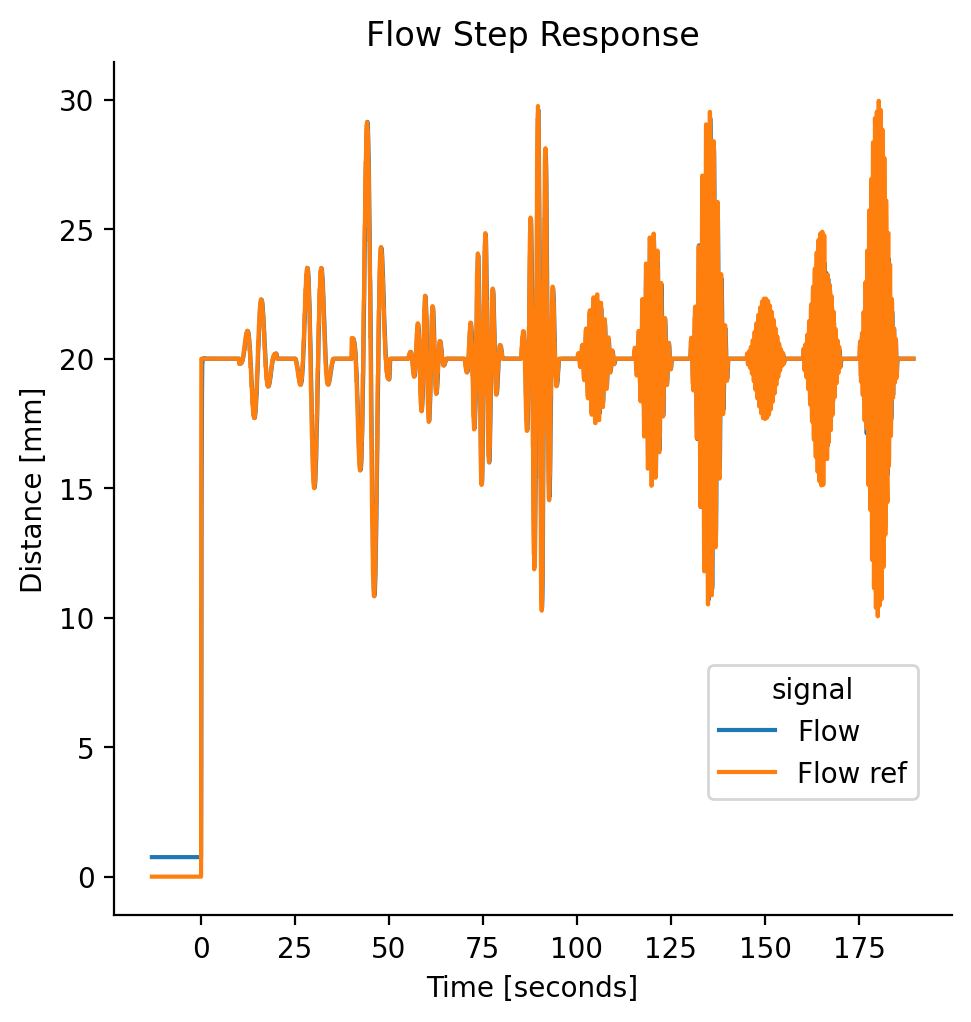

In [230]:
new_data4['Time'] = new_data4['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
p = sns.relplot(data=new_data4.loc[(new_data4['signal'] == 'Flow') | (new_data4['signal'] == 'Flow ref')], kind="line", x='Time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Flow Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Distance [mm]')
plt.show()

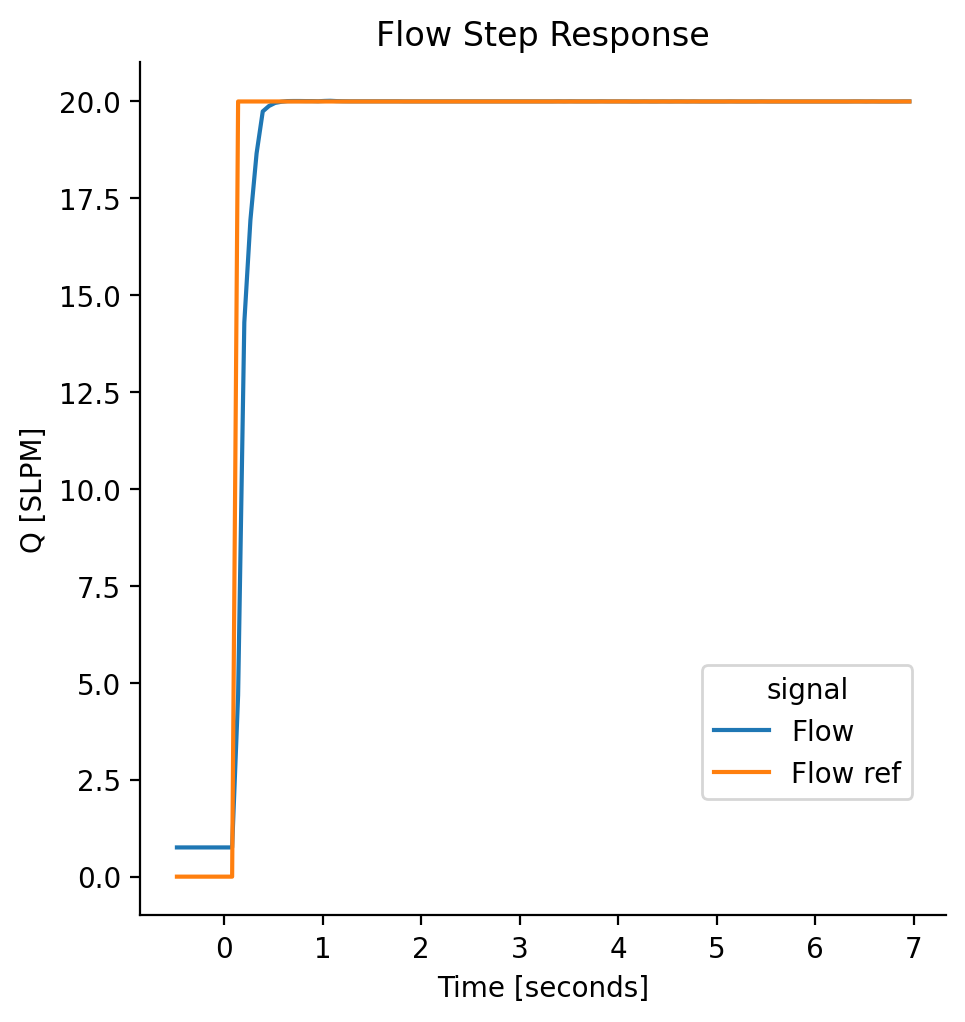

In [231]:
new_data4['step_shifted_time'] = new_data4['times'] - 13 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (5, 5)
d = new_data4.loc[((new_data4['signal'] == 'Flow') | (new_data4['signal'] == 'Flow ref')) & (new_data4['times'] > 12.5) & (new_data4['times'] < 20)]
d2 = data4.loc[(data4['times'] > 12.5) & (data4['times'] < 20)]
p = sns.relplot(data=d, kind="line", x='step_shifted_time', y='value', hue='signal')
p.fig.set_dpi(200)
sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

plt.title('Flow Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Q [SLPM]')
plt.savefig('flow_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

In [203]:
d2

Unnamed: 0      times  frequency  temperature  mass_flow  volume_flow  \
200         200  12.520192     2100.0    27.256250   0.753906     1.160156   
201         201  12.581615     2100.0    27.256250   0.753906     1.160156   
202         202  12.643843     2100.0    27.256250   0.753906     1.160156   
203         203  12.707103     2100.0    27.256250   0.753906     1.160156   
204         204  12.768856     2100.0    27.256250   0.753906     1.160156   
..          ...        ...        ...          ...        ...          ...   
315         315  19.706347     2100.0    26.565626  20.000000    30.449219   
316         316  19.769624     2100.0    26.562500  20.000000    30.449219   
317         317  19.831868     2100.0    26.559376  20.000000    30.451172   
318         318  19.892965     2100.0    26.553125  20.001953    30.451172   
319         319  19.955755     2100.0    26.550001  20.001953    30.451172   

     mouth_pressure  offset  theta  radius  ...    x  alpha_ref  z_ref  x_ref  \
200       -5.935322    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
201       -5.923159    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
202       -5.643421    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
203       -5.692071    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
204       -5.582608    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
..              ...     ...    ...     ...  ...  ...        ...    ...    ...   
315      143.749115    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
316      144.904556    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
317      142.812607    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
318      144.661301    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   
319      144.466705    76.3   45.0  115.98  ...  0.0        0.0    0.0    0.0   

     flow_ref  offset_ref  theta_ref  radius_ref       Flow  Flow ref  
200       0.0        76.3       45.0      115.98   0.753906       0.0  
201       0.0        76.3       45.0      115.98   0.753906       0.0  
202       0.0        76.3       45.0      115.98   0.753906       0.0  
203       0.0        76.3       45.0      115.98   0.753906       0.0  
204       0.0        76.3       45.0      115.98   0.753906       0.0  
..        ...         ...        ...         ...        ...       ...  
315      20.0        76.3       45.0      115.98  20.000000      20.0  
316      20.0        76.3       45.0      115.98  20.000000      20.0  
317      20.0        76.3       45.0      115.98  20.000000      20.0  
318      20.0        76.3       45.0      115.98  20.001953      20.0  
319      20.0        76.3       45.0      115.98  20.001953      20.0  

[120 rows x 22 columns]

In [204]:
mse = mean_squared_error(d2['flow_ref'], d2['mass_flow'])
print('MSE:', mse)

MSE: 2.367263603210449


In [205]:
df = d2
df['time'] = df['times']-13
# assuming your dataframe is called `df` and the response column is 'response'
steady_state = df['mass_flow'].iloc[-10:].mean()

# calculate rise time
rise_time = df.loc[(df['mass_flow'] >= 0.1*steady_state) & (df['mass_flow'] <= 0.9*steady_state), 'time'].iloc[-1] - df.loc[(df['mass_flow'] >= 0.1*steady_state) & (df['mass_flow'] <= 0.9*steady_state), 'time'].iloc[0]

# calculate overshoot
peak = df['mass_flow'].max()
overshoot = (peak - steady_state)/steady_state * 100

# # calculate settling time
settling_percentage = 0.02
settling_criteria = steady_state * (1 - settling_percentage)
settling_time = df.loc[df['mass_flow'] > settling_criteria, 'time'].iloc[0]

# # calculate ringing
t = df['time'].to_numpy()
y = df['mass_flow'].to_numpy()
f = np.fft.fft(y)
N = len(f)
dt = t[1]-t[0]
freq = np.fft.fftfreq(N, dt)
max_index = np.argmax(np.abs(f[1:N//2]))+1
ringing_period = 1/freq[max_index]
ringing_amplitude = np.abs(f[max_index])/N*2
num_ringing_cycles = np.sum(np.abs(np.cos(2*np.pi*freq[max_index]*t) - np.cos(2*np.pi*freq[max_index]*t-dt)) > 1e-2)
if num_ringing_cycles == 0:
    ringing_amplitude = 0.0

# # print results
print('Rise time:', rise_time)
print('Overshoot:', overshoot)
print('Settling time:', settling_time)
print('Ringing period:', ringing_period)
print('Ringing amplitude:', ringing_amplitude)
print('Number of ringing cycles:', num_ringing_cycles)

Rise time: 0.12499213218688965
Overshoot: 0.08300375958205165
Settling time: 0.3915572166442889
Ringing period: 7.370796203613281
Ringing amplitude: 3.581571865364866
Number of ringing cycles: 108


C:\Users\ferna\AppData\Local\Temp\ipykernel_460\4145987441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['times']-13


In [206]:
df

Unnamed: 0      times  frequency  temperature  mass_flow  volume_flow  \
200         200  12.520192     2100.0    27.256250   0.753906     1.160156   
201         201  12.581615     2100.0    27.256250   0.753906     1.160156   
202         202  12.643843     2100.0    27.256250   0.753906     1.160156   
203         203  12.707103     2100.0    27.256250   0.753906     1.160156   
204         204  12.768856     2100.0    27.256250   0.753906     1.160156   
..          ...        ...        ...          ...        ...          ...   
315         315  19.706347     2100.0    26.565626  20.000000    30.449219   
316         316  19.769624     2100.0    26.562500  20.000000    30.449219   
317         317  19.831868     2100.0    26.559376  20.000000    30.451172   
318         318  19.892965     2100.0    26.553125  20.001953    30.451172   
319         319  19.955755     2100.0    26.550001  20.001953    30.451172   

     mouth_pressure  offset  theta  radius  ...  alpha_ref  z_ref  x_ref  \
200       -5.935322    76.3   45.0  115.98  ...        0.0    0.0    0.0   
201       -5.923159    76.3   45.0  115.98  ...        0.0    0.0    0.0   
202       -5.643421    76.3   45.0  115.98  ...        0.0    0.0    0.0   
203       -5.692071    76.3   45.0  115.98  ...        0.0    0.0    0.0   
204       -5.582608    76.3   45.0  115.98  ...        0.0    0.0    0.0   
..              ...     ...    ...     ...  ...        ...    ...    ...   
315      143.749115    76.3   45.0  115.98  ...        0.0    0.0    0.0   
316      144.904556    76.3   45.0  115.98  ...        0.0    0.0    0.0   
317      142.812607    76.3   45.0  115.98  ...        0.0    0.0    0.0   
318      144.661301    76.3   45.0  115.98  ...        0.0    0.0    0.0   
319      144.466705    76.3   45.0  115.98  ...        0.0    0.0    0.0   

     flow_ref  offset_ref  theta_ref  radius_ref       Flow  Flow ref  \
200       0.0        76.3       45.0      115.98   0.753906       0.0   
201       0.0        76.3       45.0      115.98   0.753906       0.0   
202       0.0        76.3       45.0      115.98   0.753906       0.0   
203       0.0        76.3       45.0      115.98   0.753906       0.0   
204       0.0        76.3       45.0      115.98   0.753906       0.0   
..        ...         ...        ...         ...        ...       ...   
315      20.0        76.3       45.0      115.98  20.000000      20.0   
316      20.0        76.3       45.0      115.98  20.000000      20.0   
317      20.0        76.3       45.0      115.98  20.000000      20.0   
318      20.0        76.3       45.0      115.98  20.001953      20.0   
319      20.0        76.3       45.0      115.98  20.001953      20.0   

         time  
200 -0.479808  
201 -0.418385  
202 -0.356157  
203 -0.292897  
204 -0.231144  
..        ...  
315  6.706347  
316  6.769624  
317  6.831868  
318  6.892965  
319  6.955755  

[120 rows x 23 columns]

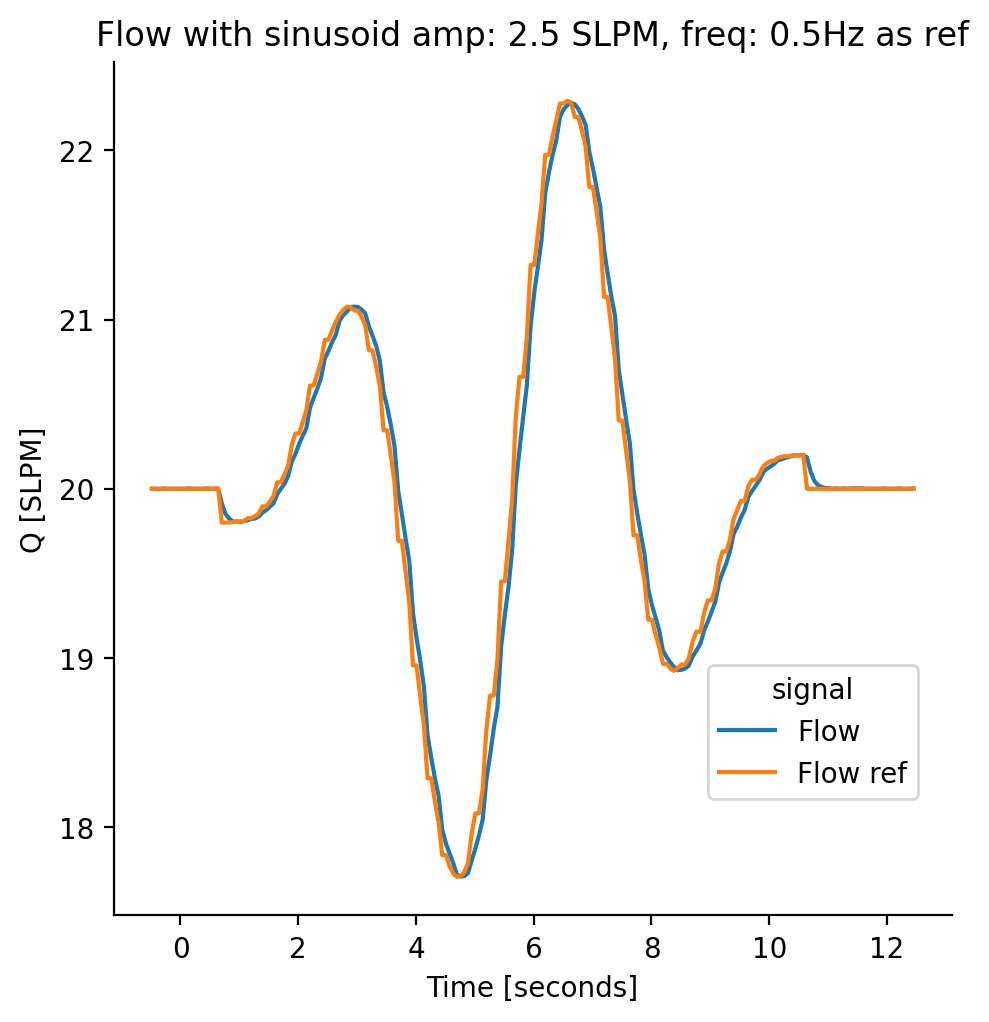

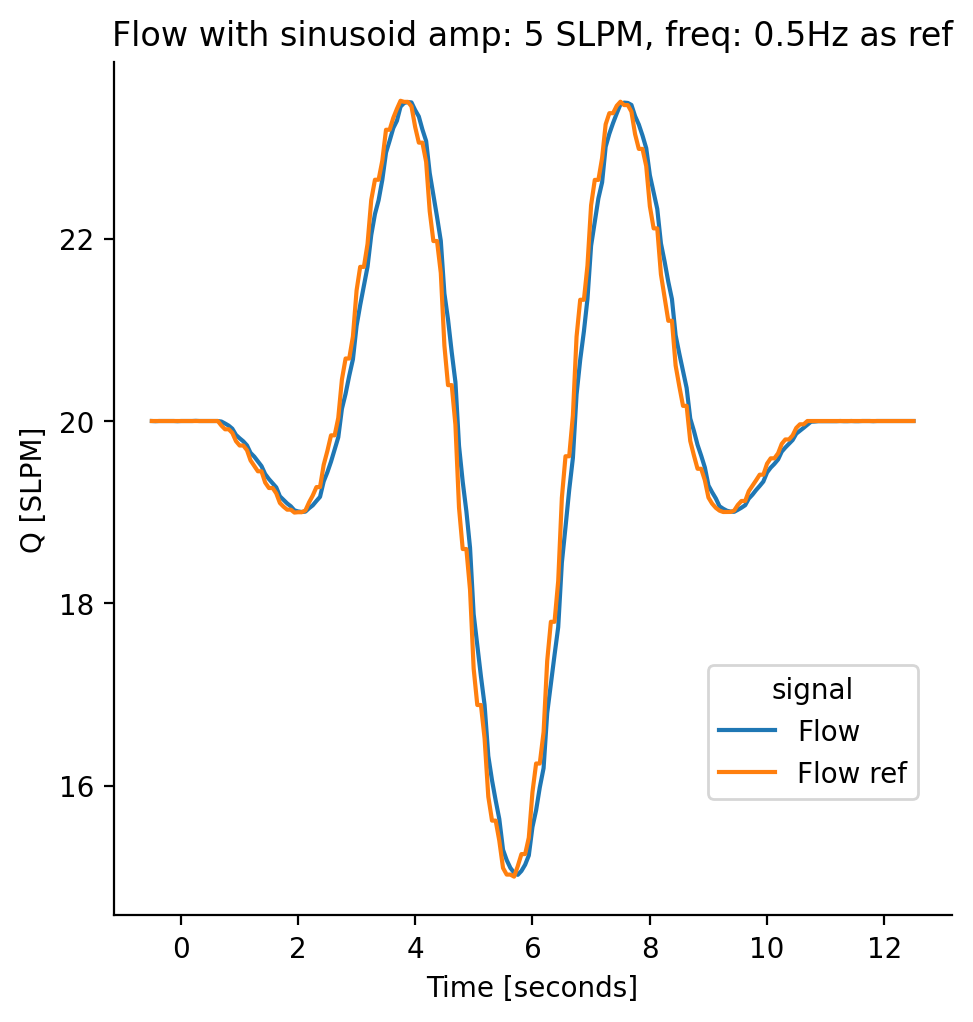

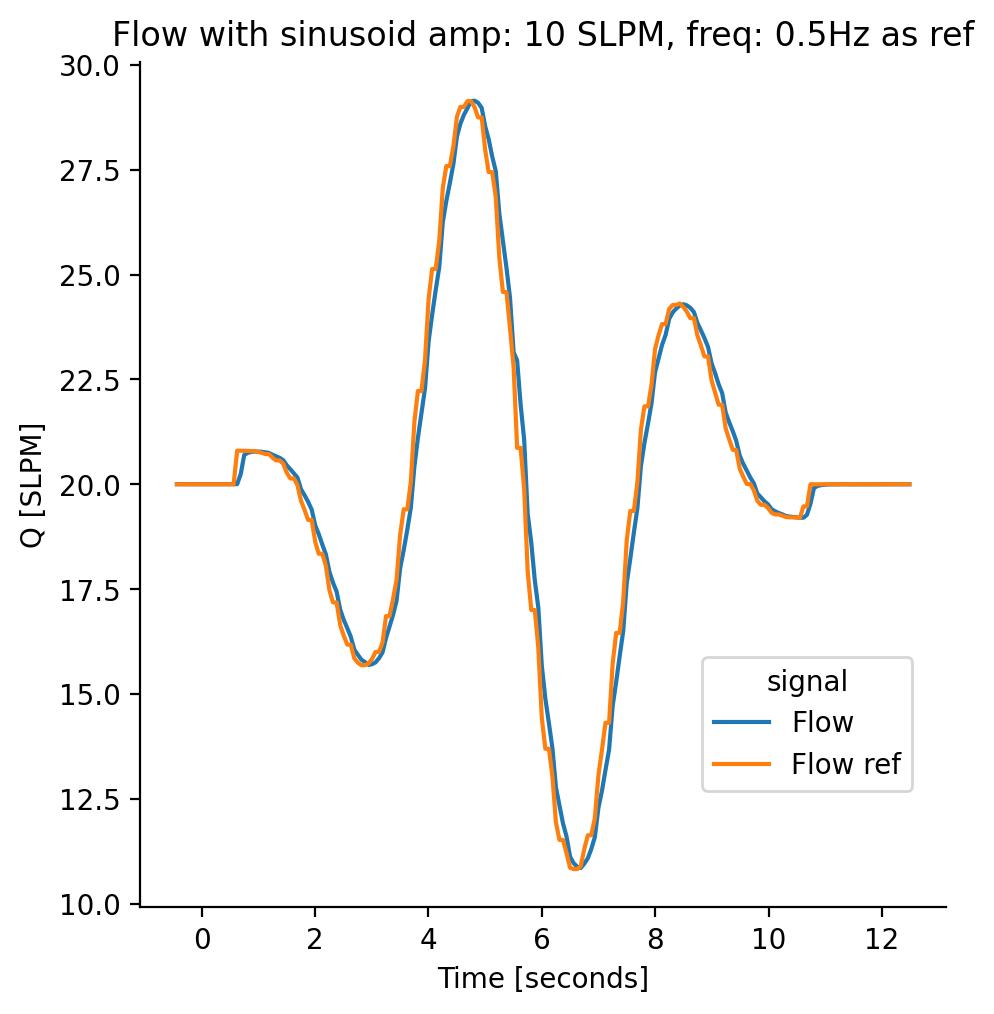

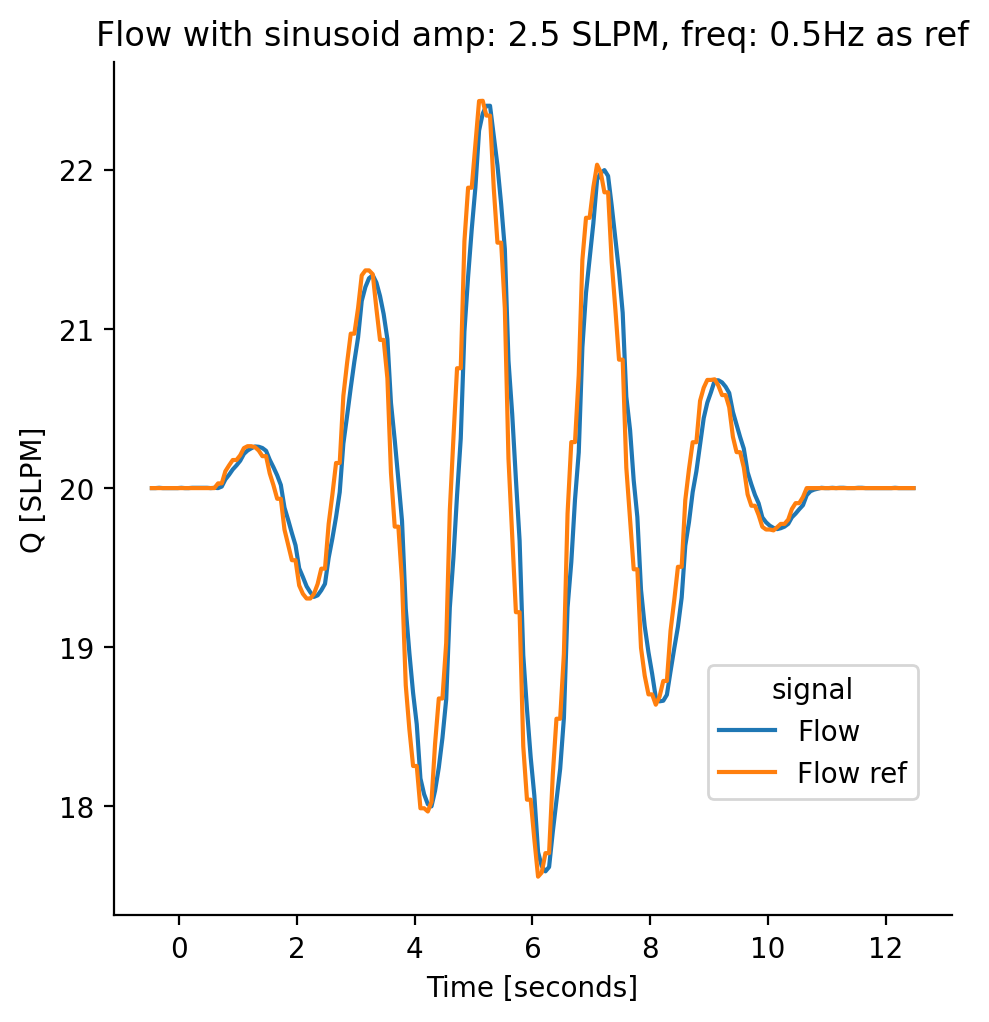

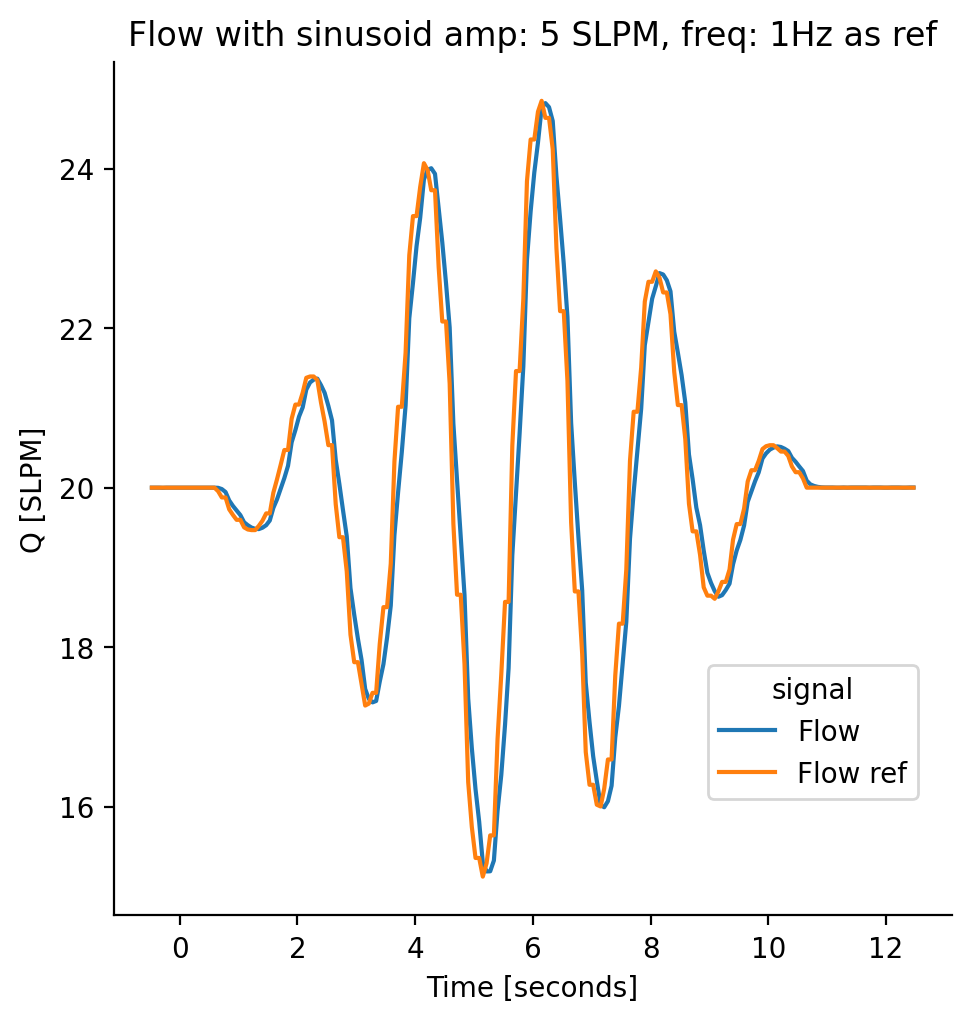

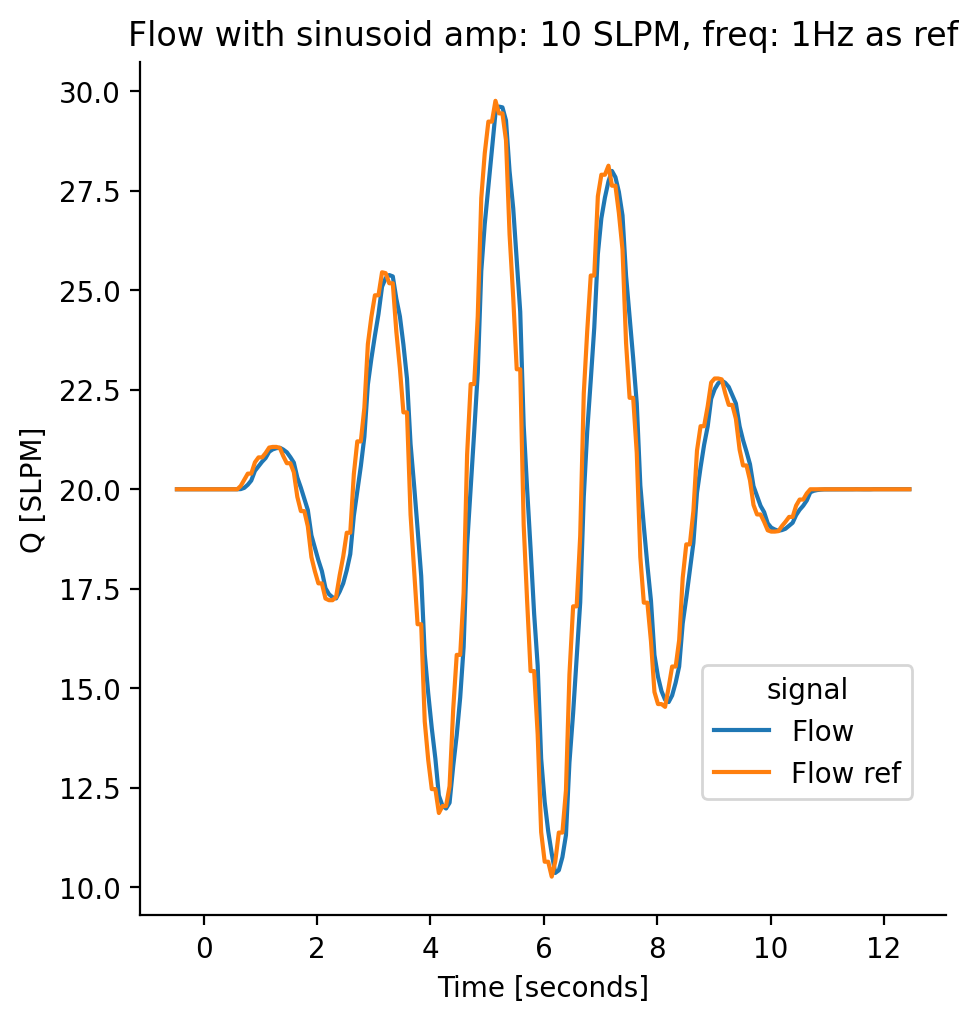

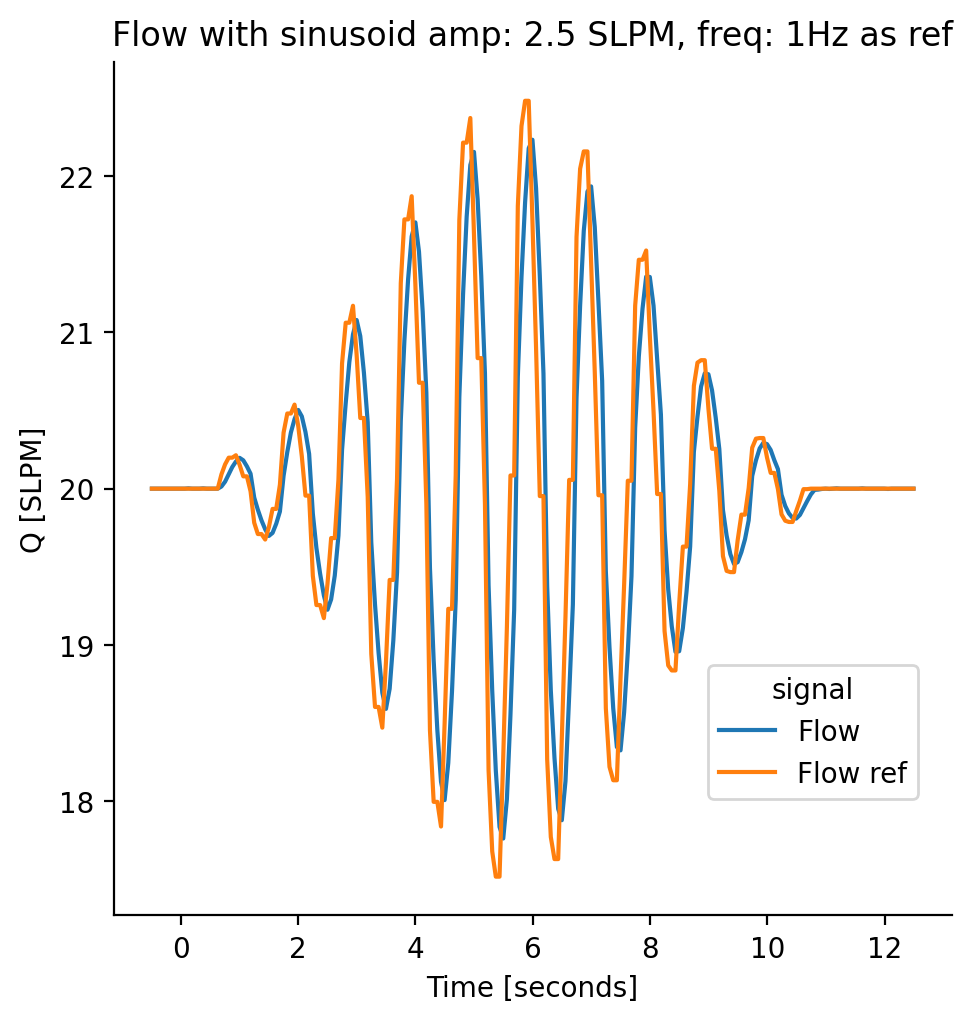

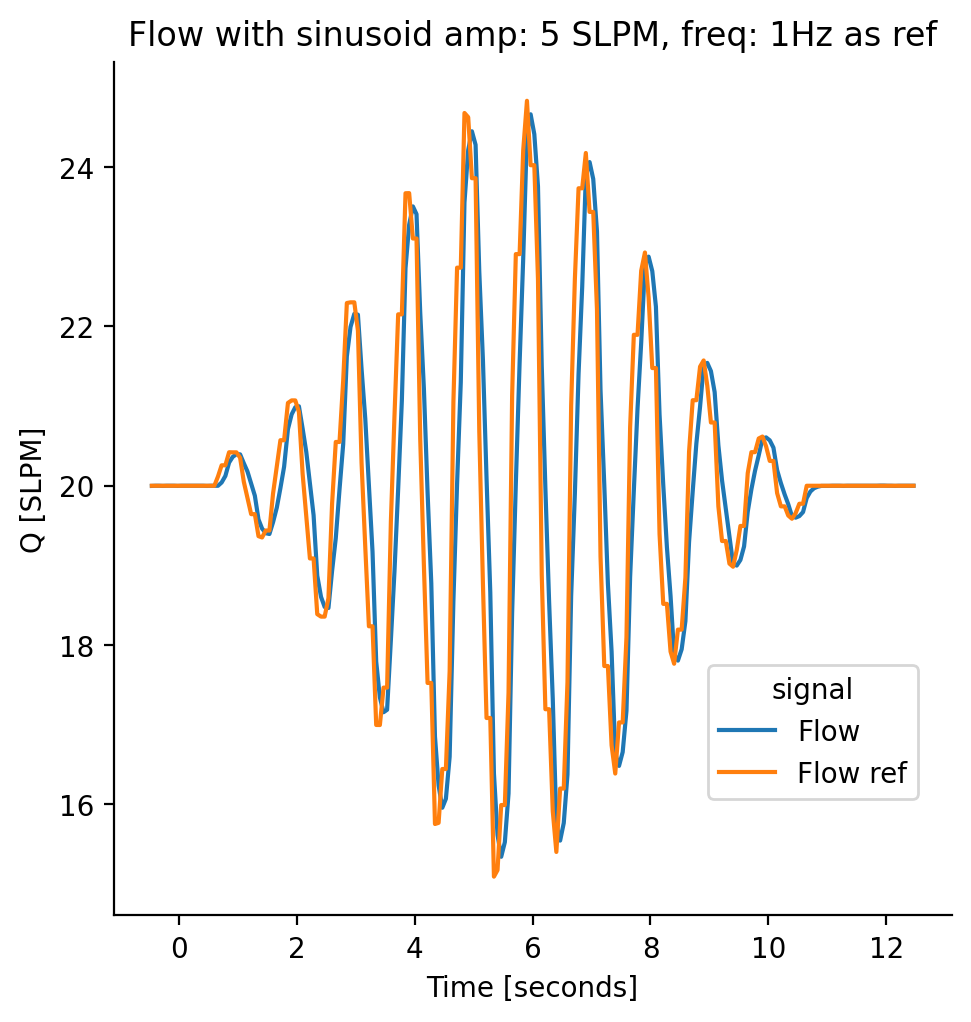

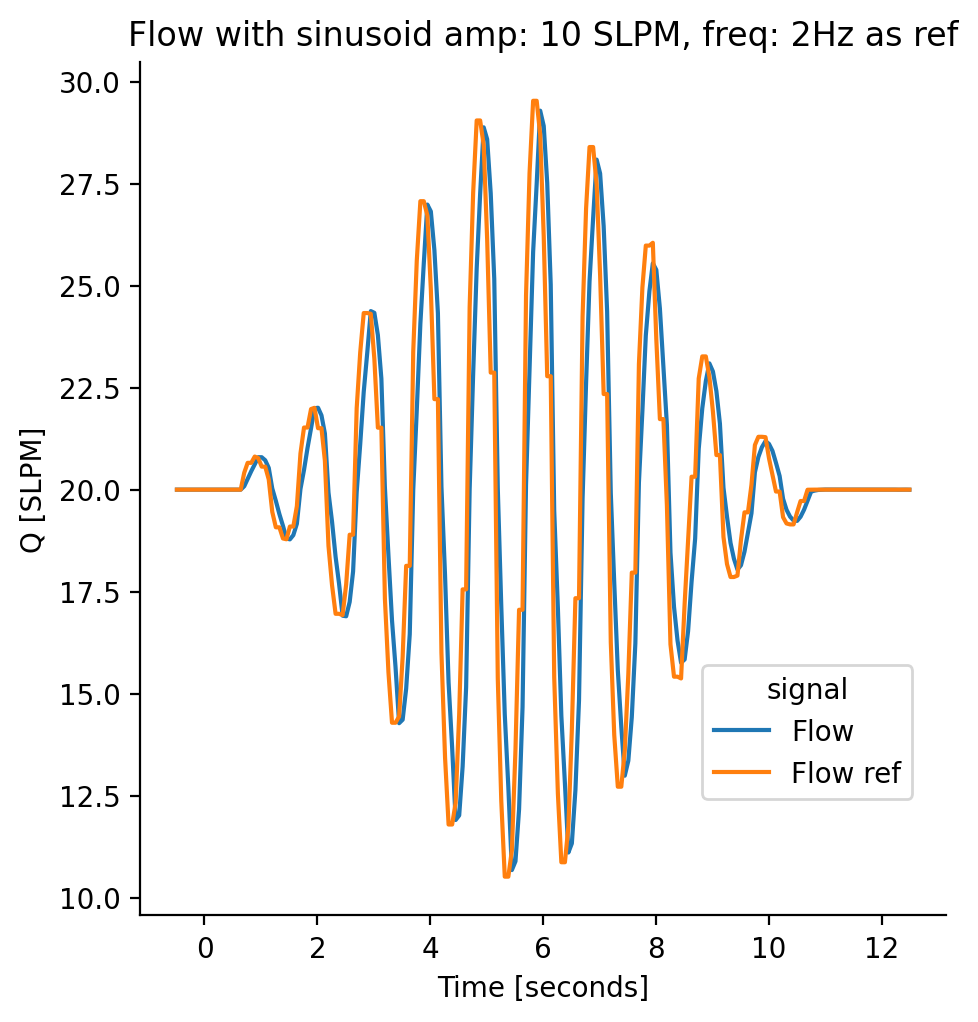

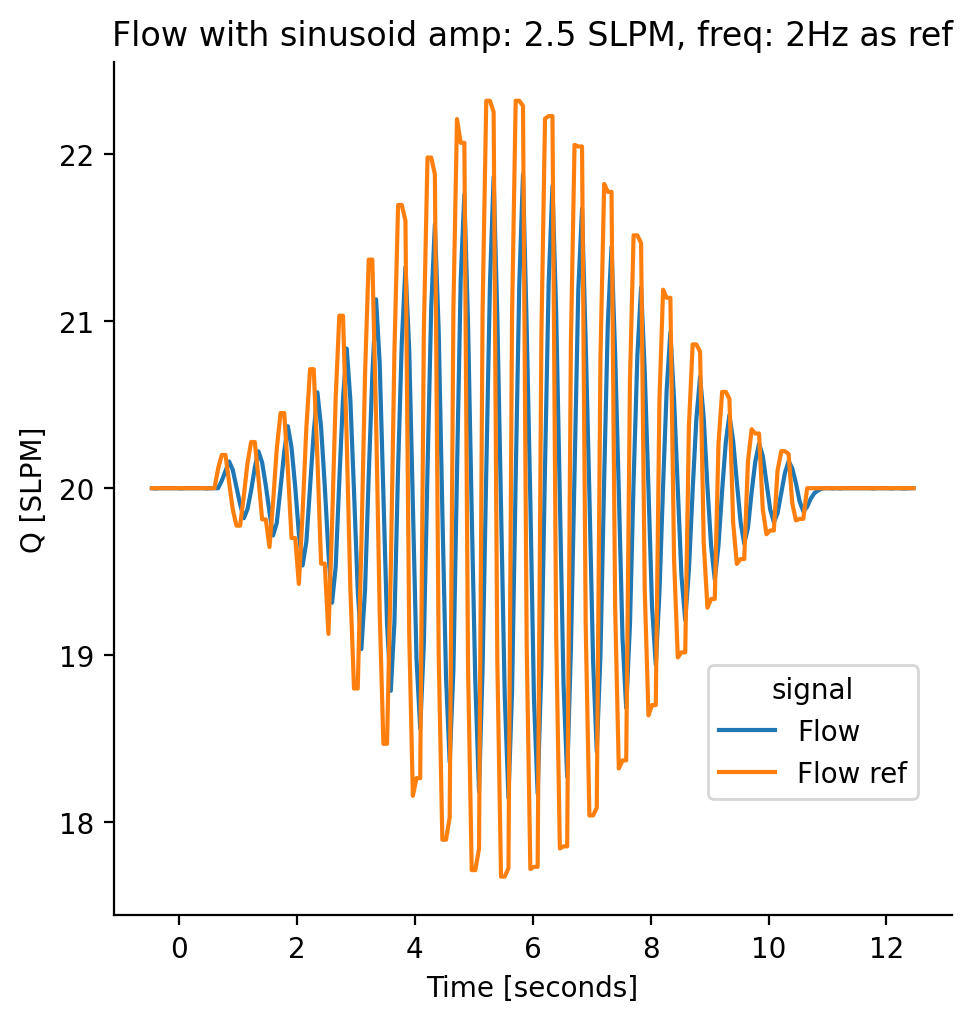

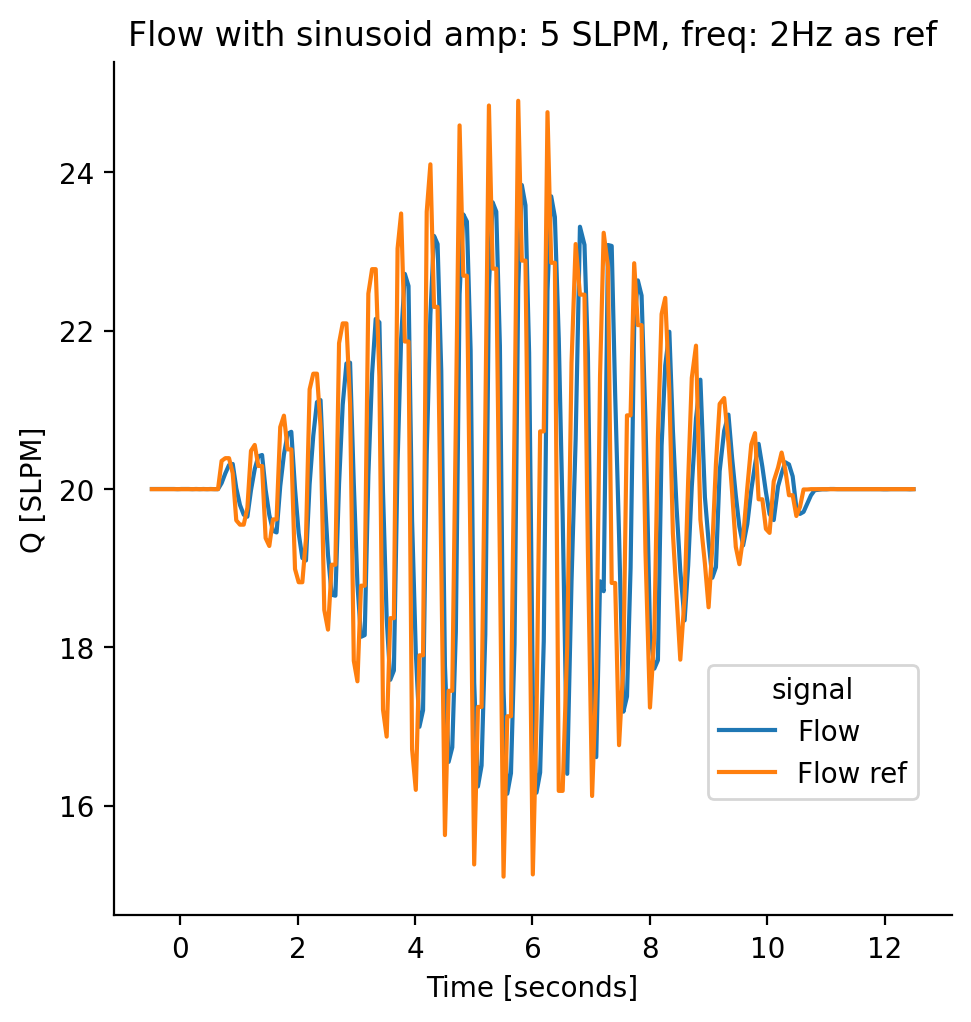

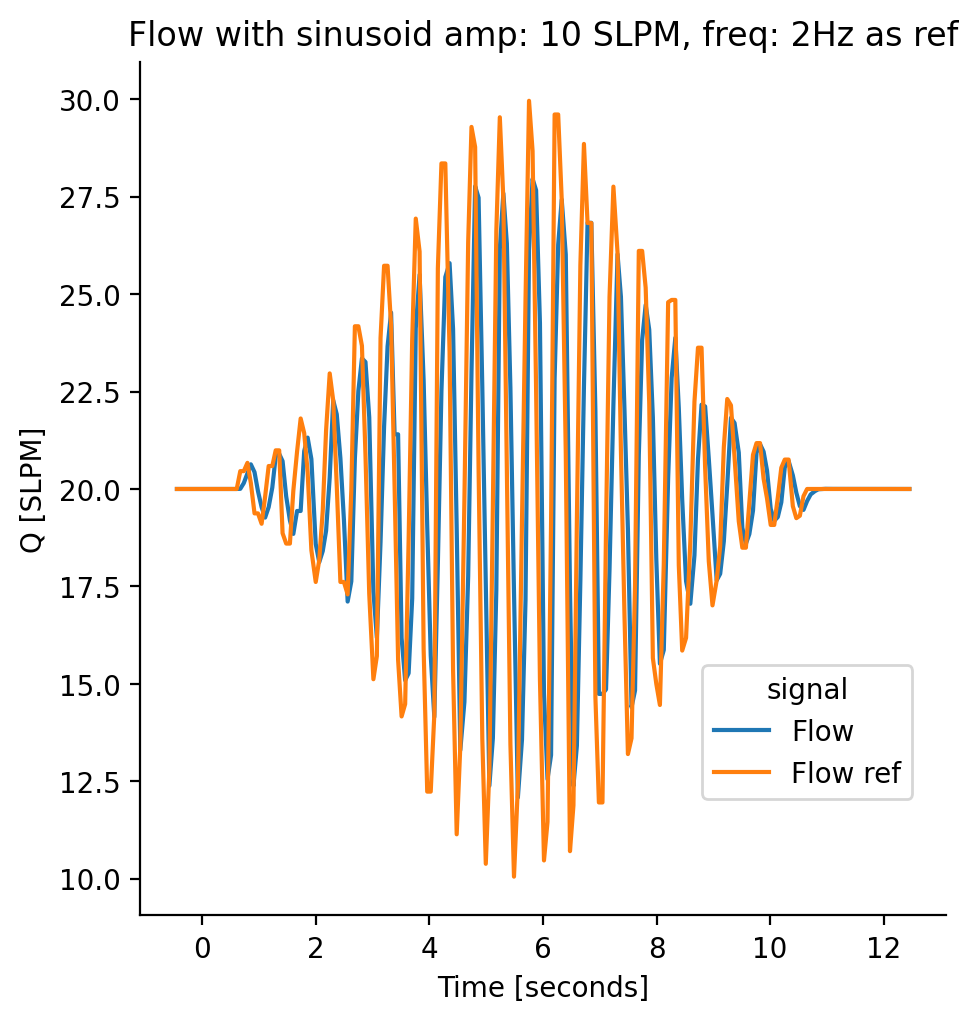

In [168]:
for i in range(12):
    ti = 22 + 15*i
    tf = 35 + 15*i
    new_data4['step_shifted_time'] = new_data4['times'] - (ti+0.5) # Correr el eje del tiempo 13 unidades a la derecha

    a4_dims = (5, 5)
    p = sns.relplot(data=new_data4.loc[((new_data4['signal'] == 'Flow') | (new_data4['signal'] == 'Flow ref')) & (new_data4['times'] > ti) & (new_data4['times'] < tf)], kind="line", x='step_shifted_time', y='value', hue='signal')
    p.fig.set_dpi(200)
    sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

    amps = [2.5, 5, 10]
    freqs = [0.5, 1, 2, 4]
    plt.title(f'Flow with sinusoid amp: {amps[i%3]} SLPM, freq: {freqs[i//4]}Hz as ref')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Q [SLPM]')
    plt.savefig(f'flow_sin{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [267]:
msex

[0.004434615384615402,
 0.055203827751196116,
 0.27109567307692284,
 0.010780769230769226,
 0.2545665071770335,
 0.9560212560386472,
 0.024420192307692316,
 0.573633173076923,
 2.0415210526315786,
 0.14969759615384617,
 4.17186889952153,
 27.718502415458936]

In [268]:
msez

[0.0021090909090909146,
 0.03936153846153842,
 0.16120717703349283,
 0.0074149038461538384,
 0.15572392344497624,
 0.6347110047846888,
 0.02088038277511959,
 0.5350918269230769,
 1.9910837320574155,
 0.10805865384615389,
 4.462066985645934,
 29.121549509803927]

In [269]:
msealpha

[0.009735576923076923,
 0.1443130434782609,
 0.4820086956521738,
 0.023676923076923075,
 0.5453091346153847,
 1.3195600961538465,
 0.09100817307692308,
 1.1003538461538462,
 3.266857894736842,
 0.2010201923076923,
 2.782934134615385,
 19.08379565217391]

In [270]:
from sklearn.metrics import confusion_matrix

y_pred = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1]
y_true = [1, 0, 1, 0, 1, 1, 0, 0, 1, 1]

# Calculamos la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

In [271]:
cm

array([[2, 2],
       [2, 4]], dtype=int64)

In [272]:
mse_matrix = pd.dataframe(columns=['Axis', 'Freq', 'Amp', 'MSE'])

AttributeError: module 'pandas' has no attribute 'dataframe'

In [297]:
mse_file_path = "C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/mse.csv"
mse = pd.read_csv(mse_file_path)

In [298]:
matrix_x = mse.loc[mse['Axis'] == 'X'].pivot(index='Frequency', columns='Amplitude', values='MSE')
matrix_z = mse.loc[mse['Axis'] == 'Z'].pivot(index='Frequency', columns='Amplitude', values='MSE')
matrix_a = mse.loc[mse['Axis'] == 'Alpha'].pivot(index='Frequency', columns='Amplitude', values='MSE')


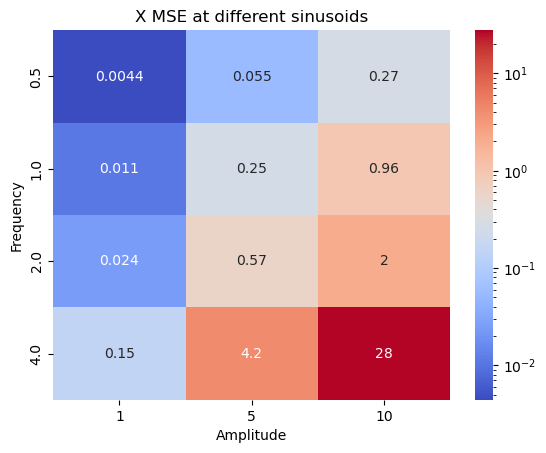

In [302]:
sns.heatmap(matrix_x, cmap='coolwarm',
            norm=matplotlib.colors.LogNorm(), annot=True)

plt.title('X MSE at different sinusoids')
plt.savefig('x_mse.png', dpi=300, bbox_inches='tight')
plt.show()

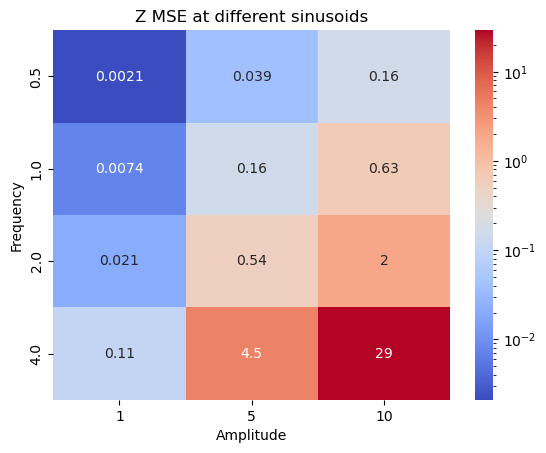

In [303]:
sns.heatmap(matrix_z, cmap='coolwarm',
            norm=matplotlib.colors.LogNorm(), annot=True)

plt.title('Z MSE at different sinusoids')
plt.savefig('z_mse.png', dpi=300, bbox_inches='tight')
plt.show()

In [282]:
import matplotlib

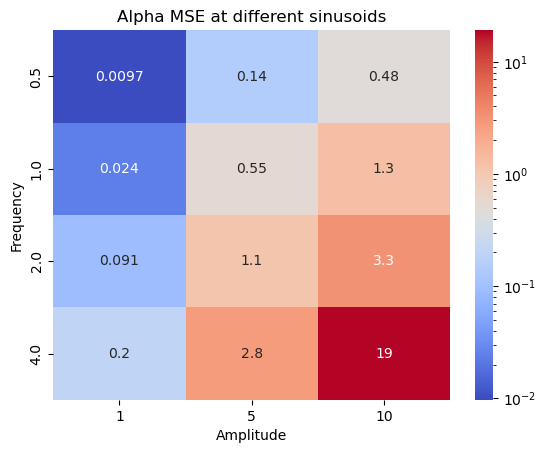

In [304]:
sns.heatmap(matrix_a, cmap='coolwarm',
            norm=matplotlib.colors.LogNorm(), annot=True)

plt.title('Alpha MSE at different sinusoids')
plt.savefig('alpha_mse.png', dpi=300, bbox_inches='tight')
plt.show()